---
# ~ Open Class HMIF Data Science August 2024 ~

---
# **Razi Rachman Widyadhana**

- NIM TPB: `19623613`

- NIM Jurusan: `13523004`

---
# ~ CO2 Prediction ~


**Problem Statement**

> *The primary goal of this competition is to explore and analyze the relationship between various vehicle features—such as fuel type, transmission, and fuel consumption—and their corresponding CO2 emissions. Participants are challenged to build regression models that can accurately predict CO2 emissions based on these features. Additionally, you are encouraged to test hypotheses related to fuel efficiency and emission standards, providing insights that could potentially guide future environmental policies and automotive designs.*


**Aim**
> *Participants are expected to leverage their data science skills to uncover patterns and build predictive models that can accurately estimate CO2 emissions. This competition not only tests your ability to work with real-world data but also encourages you to contribute to the ongoing conversation around sustainable transportation and environmental impact.*

---
# ~ Dataset Description ~

- `train.csv`
  
  *data contains vehicles data for model training*

  1.  `ID`                               : Unique ID 
   
  2.  `Make`                             : Manufacturer Company

  3.  `Model`                            : Model of the Vehicle
   
  4.  `Vehicle Class`                    : Class of the Vehicle
  
  5.  `Engine Size(L)`                   : Size of the Vehicle Engine in Liters
  
  6.  `Cylinders`                        : Type of the Engine
  
  7.  `Transmission`                     : Type of the Transmission
  
  8.  `Fuel Consumption City (L/100 km)` : Fuel Consumption in City (L/100 km)

  9.  `Fuel Consumption Hwy (L/100 km)`  : Fuel Consumption in Highway (L/100 km)

  10. `Fuel Consumption Comb (L/100 km)` : Fuel Consumption in Combined (L/100 km)

  11. `Fuel Consumption Comb (mpg)`      : Fuel Consumption in Combined (mpg)

  12. `CO2 Emissions (g/km)`             : Target Variable (g/km)

- `test.csv`
  
  *data contains vehicles data for model evaluation*

  1.  `ID`                               : Unique ID 
   
  2.  `Make`                             : Manufacturer Company

  3.  `Model`                            : Model of the Vehicle
   
  4.  `Vehicle Class`                    : Class of the Vehicle
  
  5.  `Engine Size(L)`                   : Size of the Vehicle Engine in Liters
  
  6.  `Cylinders`                        : Type of the Engine
  
  7.  `Transmission`                     : Type of the Transmission
  
  8.  `Fuel Consumption City (L/100 km)` : Fuel Consumption in City (L/100 km)

  9.  `Fuel Consumption Hwy (L/100 km)`  : Fuel Consumption in Highway (L/100 km)

  10. `Fuel Consumption Comb (L/100 km)` : Fuel Consumption in Combined (L/100 km)

  11. `Fuel Consumption Comb (mpg)`      : Fuel Consumption in Combined (mpg)

  12. `CO2 Emissions (g/km)`             : Target Variable (g/km)

- `sample_submission.csv`
  
  *data contains submission example*

  1. `ID`                        : Unique ID
  2. `CO2 Emissions (g/km)`      : Target Variable

---
# ~ Notebook Contents ~

1. **Initial Dataset Exploration**

2. **Exploratory Data Analysis**

3. **Feature Engineering**

4. **Modelling, Evalution, & Submission**

---
# ~ Initial Dataset Exploration ~

In [4]:
# pip install lazypredict

In [5]:
# pip install --upgrade nbformat

## 1. Import library

In [6]:
# Data manipulation
import io
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Label encoding
from sklearn.preprocessing import LabelEncoder

# Iteravite imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Stats
from scipy.stats import skew, boxcox_normmax, yeojohnson, probplot, norm
from scipy.special import boxcox1p, inv_boxcox1p

# Tokenization
import nltk
from nltk.tokenize import word_tokenize

# Regex
import re

# Split
from sklearn.model_selection import train_test_split

# Lazypredict
from lazypredict.Supervised import LazyRegressor

# Models & Evaluation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# RMSE
from sklearn.metrics import mean_squared_error

# KFold
from sklearn.model_selection import KFold

# Hyperparameter Tuning
import optuna
from optuna.logging import _get_library_root_logger
from optuna.samplers import TPESampler
from functools import partial

# Warning
import warnings
warnings.filterwarnings('ignore')

# Define the rc parameters
rc_params = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

# Update matplotlib's rcParams
plt.rcParams.update(rc_params)
cmap = sns.diverging_palette(220, 20, as_cmap = True)

OPTUNA_OPTIMIZATION = True
RANDOM_STATE = 42

## 2. Load Utils

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Razi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 3. Load data

### `train.csv`

In [8]:
train   = pd.read_csv('../data/train.csv')
target  = train['CO2 Emissions(g/km)']
train.drop('ID', axis = 1, inplace = True)

### `test.csv`

In [9]:
test    = pd.read_csv('../data/test.csv')
id_test = test['ID']
test.drop('ID', axis=1, inplace=True)

## 4. Shape & Header

In [10]:
train

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.50,4,AS6,X,10.80,8.70,9.80,29,230
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40,8,M6,Z,16.20,10.90,13.80,20,324
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.50,6,A6,E,17.90,NaN,15.70,18,261
3,CADILLAC,ATS-V,COMPACT,3.60,6,AS8,Z,13.90,9.40,11.90,24,279
4,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.00,6,AS8,D,10.70,8.30,9.60,29,256
...,...,...,...,...,...,...,...,...,...,...,...,...
5903,CHEVROLET,Suburban 4WD,SUV - STANDARD,5.30,8,A6,X,NaN,11.30,14.40,20,337
5904,HYUNDAI,ELANTRA,MID-SIZE,1.80,4,M6,X,NaN,6.40,7.70,37,180
5905,FORD,F-150 4X4,PICKUP TRUCK - STANDARD,3.50,6,AS10,X,14.30,10.50,12.50,23,295
5906,MERCEDES-BENZ,AMG C 63 COUPE,SUBCOMPACT,4.00,8,A7,Z,13.80,NaN,12.10,23,285


In [11]:
test

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,CHEVROLET,MALIBU,MID-SIZE,1.50,4,A6,X,8.70,6.30,7.60,37
1,LINCOLN,MKZ HYBRID,MID-SIZE,2.00,4,AV,X,5.70,6.20,5.90,48
2,TOYOTA,GR Supra,TWO-SEATER,3.00,6,AS8,Z,9.90,7.70,8.90,32
3,FORD,F-150 RAPTOR 4X4,PICKUP TRUCK - STANDARD,6.20,8,AS6,X,20.40,15.00,18.00,16
4,CADILLAC,ATS AWD,COMPACT,3.60,6,AS8,X,12.10,8.60,10.50,27
...,...,...,...,...,...,...,...,...,...,...,...
1472,MERCEDES-BENZ,AMG GLC 63 S 4MATIC+ Coupe,SUV - SMALL,4.00,8,A9,Z,15.00,10.90,13.20,21
1473,ASTON MARTIN,V12 VANTAGE S,TWO-SEATER,6.00,12,AM7,Z,19.50,12.80,16.50,17
1474,KIA,FORTE 5,FULL-SIZE,2.00,4,M6,X,9.80,7.00,8.50,33
1475,CHEVROLET,EQUINOX AWD,SUV - SMALL,3.60,6,A6,X,14.80,9.90,NaN,22


## 5. Features type

In [ ]:
def reformat_columns(df):
    copy = df.copy(deep = True)
    copy.columns = copy.columns.str.replace(' ', '_')
    return copy

def check_types(df):
    buffer = io.StringIO()
    df.info(buf=buffer)
    
    lines = buffer.getvalue().splitlines()
    types_info = (pd.DataFrame([x.split() for x in lines[5:-2]], columns=lines[3].split())).drop(['Count', 'Non-Null', '#'], axis=1)

    return types_info.set_index('Column')

### `train.csv`

In [13]:
check_types(train)

,Dtype
Column,
Make,object
Model,object
Vehicle_Class,object
Engine_Size(L),float64
Cylinders,int64
Transmission,object
Fuel_Type,object
Fuel_Consumption_City_(L/100_km),float64
Fuel_Consumption_Hwy_(L/100_km),float64


### `test.csv`

In [14]:
check_types(train)

,Dtype
Column,
Make,object
Model,object
Vehicle_Class,object
Engine_Size(L),float64
Cylinders,int64
Transmission,object
Fuel_Type,object
Fuel_Consumption_City_(L/100_km),float64
Fuel_Consumption_Hwy_(L/100_km),float64


## 6. Data Duplicates

In [15]:
train[train.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
110,CHEVROLET,SONIC,COMPACT,1.40,4,M6,X,8.50,6.20,7.50,38,173
143,VOLKSWAGEN,BEETLE,COMPACT,1.80,4,M5,X,9.90,7.20,8.70,32,200
391,PORSCHE,CAYENNE DIESEL (modified),SUV - STANDARD,3.00,6,A8,D,11.80,8.10,10.20,28,277
428,PORSCHE,Panamera 4S ST,FULL-SIZE,2.90,6,AM8,Z,13.10,9.80,11.60,24,273
495,INFINITI,Q50 AWD Red Sport,MID-SIZE,3.00,6,AS7,Z,12.50,9.30,11.10,25,261
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,NISSAN,VERSA,COMPACT,1.60,4,M5,X,NaN,6.50,7.70,37,177
5867,FORD,Transit Connect Wagon LWB FFV,SPECIAL PURPOSE VEHICLE,2.00,4,AS8,X,9.90,8.20,NaN,31,214
5883,CHEVROLET,MALIBU HYBRID,MID-SIZE,1.80,4,AV,X,4.80,5.50,5.10,55,121
5891,PORSCHE,CAYENNE S,SUV - STANDARD,3.60,6,A8,Z,14.30,9.60,12.20,23,286


### *Show dups examples*

In [16]:
train.loc[(train['Make'] == 'FORD') & (train['Model'] == 'EDGE') & (train['Vehicle Class'] == 'SUV - SMALL') & (train['CO2 Emissions(g/km)'] == 270)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1234,FORD,EDGE,SUV - SMALL,3.50,6,AS6,X,13.50,9.10,11.50,25,270
1370,FORD,EDGE,SUV - SMALL,3.50,6,AS6,X,13.50,9.10,11.50,25,270


In [17]:
train.drop_duplicates(inplace = True)
train.duplicated().sum()

0

## 7. Data Statistics

### `train.csv`

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5385.00,3.17,1.36,0.90,2.00,3.00,3.70,8.40
Cylinders,5385.00,5.63,1.84,3.00,4.00,6.00,6.00,16.00
Fuel Consumption City (L/100 km),5095.00,12.60,3.52,4.20,10.20,12.10,14.60,30.60
Fuel Consumption Hwy (L/100 km),5091.00,9.05,2.24,4.00,7.50,8.70,10.20,20.60
Fuel Consumption Comb (L/100 km),5092.00,11.02,2.90,4.10,9.00,10.60,12.70,26.10
Fuel Consumption Comb (mpg),5385.00,27.42,7.22,11.00,22.00,27.00,31.00,69.00
CO2 Emissions(g/km),5385.00,251.30,59.09,96.00,209.00,246.00,289.00,522.00


### `test.csv`

In [19]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),1477.00,3.15,1.38,0.90,2.00,3.00,3.70,8.40
Cylinders,1477.00,5.58,1.82,3.00,4.00,6.00,6.00,16.00
Fuel Consumption City (L/100 km),1403.00,12.59,3.65,4.20,9.90,12.00,14.70,30.20
Fuel Consumption Hwy (L/100 km),1403.00,9.07,2.32,4.00,7.40,8.70,10.30,20.50
Fuel Consumption Comb (L/100 km),1403.00,11.03,3.05,4.10,8.80,10.60,12.70,25.80
Fuel Consumption Comb (mpg),1477.00,27.54,7.39,11.00,22.00,27.00,32.00,69.00


---
# ~ Exploratory Data Analysis ~

## 1. Missing Values

### *Explore the NaN!*

In [20]:
def missing_values_summary(df):
  # Create a dataframe with the number of missing values for each column
  missing_count = df.isnull().sum().rename('Missing Count')

  # Create a dataframe with the ratio of missing values for each column
  missing_ratio = (df.isnull().mean()*100).rename('Missing Percentage (%)')

  # Combine the two dataframes
  summary = missing_count.to_frame().join(missing_ratio.to_frame())

  return summary

In [21]:
missing_values_summary(train).sort_values(["Missing Percentage (%)"], ascending = [0])

,Missing Count,Missing Percentage (%)
Fuel Consumption Hwy (L/100 km),294,5.46
Fuel Consumption Comb (L/100 km),293,5.44
Fuel Consumption City (L/100 km),290,5.39
Make,0,0.00
Model,0,0.00
Vehicle Class,0,0.00
Engine Size(L),0,0.00
Cylinders,0,0.00
Transmission,0,0.00
Fuel Type,0,0.00


In [22]:
missing_values_summary(test).sort_values(["Missing Percentage (%)"], ascending = [0])

,Missing Count,Missing Percentage (%)
Fuel Consumption City (L/100 km),74,5.01
Fuel Consumption Hwy (L/100 km),74,5.01
Fuel Consumption Comb (L/100 km),74,5.01
Make,0,0.00
Model,0,0.00
Vehicle Class,0,0.00
Engine Size(L),0,0.00
Cylinders,0,0.00
Transmission,0,0.00
Fuel Type,0,0.00


#### *Might there's a formula?* **Yes!** 

#### `L / 100 km = 282,48 / mpg` ~~~~~ `Comb = (City * 0.55 + Hwy * 0.45)`

*Since there's no missing values in `Fuel Consumption Comb (mpg)` then the step are*

1. *Convert (mpg) to (L/100 km) that contains NaN*

2. *Count Combination of missing in `Fuel Consumption`*

#### *But, let's check is the formula correct*

In [23]:
train.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.50,4,AS6,X,10.80,8.70,9.80,29,230
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40,8,M6,Z,16.20,10.90,13.80,20,324
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.50,6,A6,E,17.90,NaN,15.70,18,261
3,CADILLAC,ATS-V,COMPACT,3.60,6,AS8,Z,13.90,9.40,11.90,24,279
4,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.00,6,AS8,D,10.70,8.30,9.60,29,256


`L / 100 km = 282,48 / mpg`

In [24]:
print(round(282.42/29, 1), '|', round(282.42/20, 1), '|', round(282.42/18, 1), '|', round(282.42/24, 1), '|', round(282.42/29, 1))

9.7 | 14.1 | 15.7 | 11.8 | 9.7


`Comb = (City + Hwy) / 2`

In [25]:
print(round((10.8 * 0.55 + 8.7 * 0.45), 1), '|', round((16.2 * 0.55 + 10.9 * 0.45), 1), '|', round((13.9 * 0.55 + 9.4 * 0.45), 1), '|', round((10.7 * 0.55 + 8.3 * 0.45), 1))

9.9 | 13.8 | 11.9 | 9.6


#### *Pretty accurate, eh? Let's implement it* 

In [26]:
def convert_mpg_to_lkm(mpg):
    # Convert mpg to L/100 km
    return round((282.42 / mpg), 1) if pd.notna(mpg) else None

def fill_fuel_row(row):
    # Ensure Comb value is set
    if pd.isna(row['Fuel Consumption Comb (L/100 km)']):
        row['Fuel Consumption Comb (L/100 km)'] = convert_mpg_to_lkm(row['Fuel Consumption Comb (mpg)'])
    
    # Calculate City and Hwy values if NaN
    if pd.isna(row['Fuel Consumption City (L/100 km)']):
        row['Fuel Consumption City (L/100 km)'] = round(row['Fuel Consumption Comb (L/100 km)'] - row['Fuel Consumption Hwy (L/100 km)'] * 0.45, 1) if pd.notna(row['Fuel Consumption Hwy (L/100 km)']) else row['Fuel Consumption Comb (L/100 km)']
    
    if pd.isna(row['Fuel Consumption Hwy (L/100 km)']):
        row['Fuel Consumption Hwy (L/100 km)'] = round(row['Fuel Consumption Comb (L/100 km)'] - row['Fuel Consumption City (L/100 km)'] * 0.55, 1) if pd.notna(row['Fuel Consumption City (L/100 km)']) else row['Fuel Consumption Comb (L/100 km)']
    
    # Handle case where both City and Hwy are NaN
    if pd.isna(row['Fuel Consumption City (L/100 km)']) and pd.isna(row['Fuel Consumption Hwy (L/100 km)']):
        row['Fuel Consumption City (L/100 km)'] = row['Fuel Consumption Comb (L/100 km)']
        row['Fuel Consumption Hwy (L/100 km)'] = row['Fuel Consumption Comb (L/100 km)']
    
    return row

def fill_fuel(df):
    df = df.apply(fill_fuel_row, axis=1)
    return df

In [27]:
train_imputed = fill_fuel(train)
train_imputed.isna().sum().sum()

0

#### *Awalnya kepikiran ini, tapi diliat" agak overkill jadinya ga dipake*

In [28]:
def iterative_impute() :

    encoded = (pd.concat([train.drop(columns = 'CO2 Emissions(g/km)'), test], axis = 0)).copy(deep = True)
    col     = encoded.columns

    # Label encoding
    le = LabelEncoder()
    cat_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

    for cat in cat_features:
        encoded[cat] = le.fit_transform(encoded[cat])

    # Iterative imputer
    imputer = IterativeImputer(max_iter           = 15, 
                               random_state       = RANDOM_STATE, 
                               n_nearest_features = 5, 
                               tol                = 0.001, 
                               skip_complete      = True,
                               min_value          = 0,
                               initial_strategy   = 'most_frequent',
                               missing_values     = np.nan, 
                               imputation_order   = 'ascending')
    
    # Split the data after encoding
    train_imputed = encoded[:train.shape[0]]
    test_imputed  = encoded[train.shape[0]:]

    # Impute missing values
    train_imputed[col] = imputer.fit_transform(train_imputed[col])
    test_imputed[col]  = imputer.transform(test_imputed[col])

    # Inverse label encoding
    train_imputed[cat_features] = train[cat_features]
    test_imputed[cat_features]  = test[cat_features]

    return train_imputed, test_imputed

## 2. Distribution Analysis

### `Target`

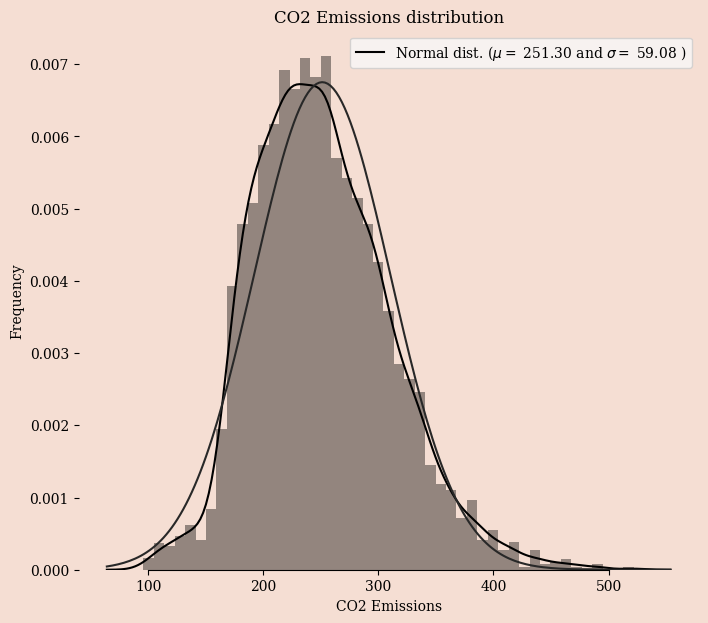

In [29]:
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7), facecolor = '#f5ded3')
ax.set_facecolor('#f5ded3')

#Check the new distribution
sns.distplot(train_imputed['CO2 Emissions(g/km)'] , fit=norm, color='#000000');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_imputed['CO2 Emissions(g/km)'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="CO2 Emissions")
ax.set(title="CO2 Emissions distribution")
sns.despine(trim=True, left=True)
plt.show()

### `num_features`

In [30]:
num_features = [feature for feature in train.columns if feature not in ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)']]

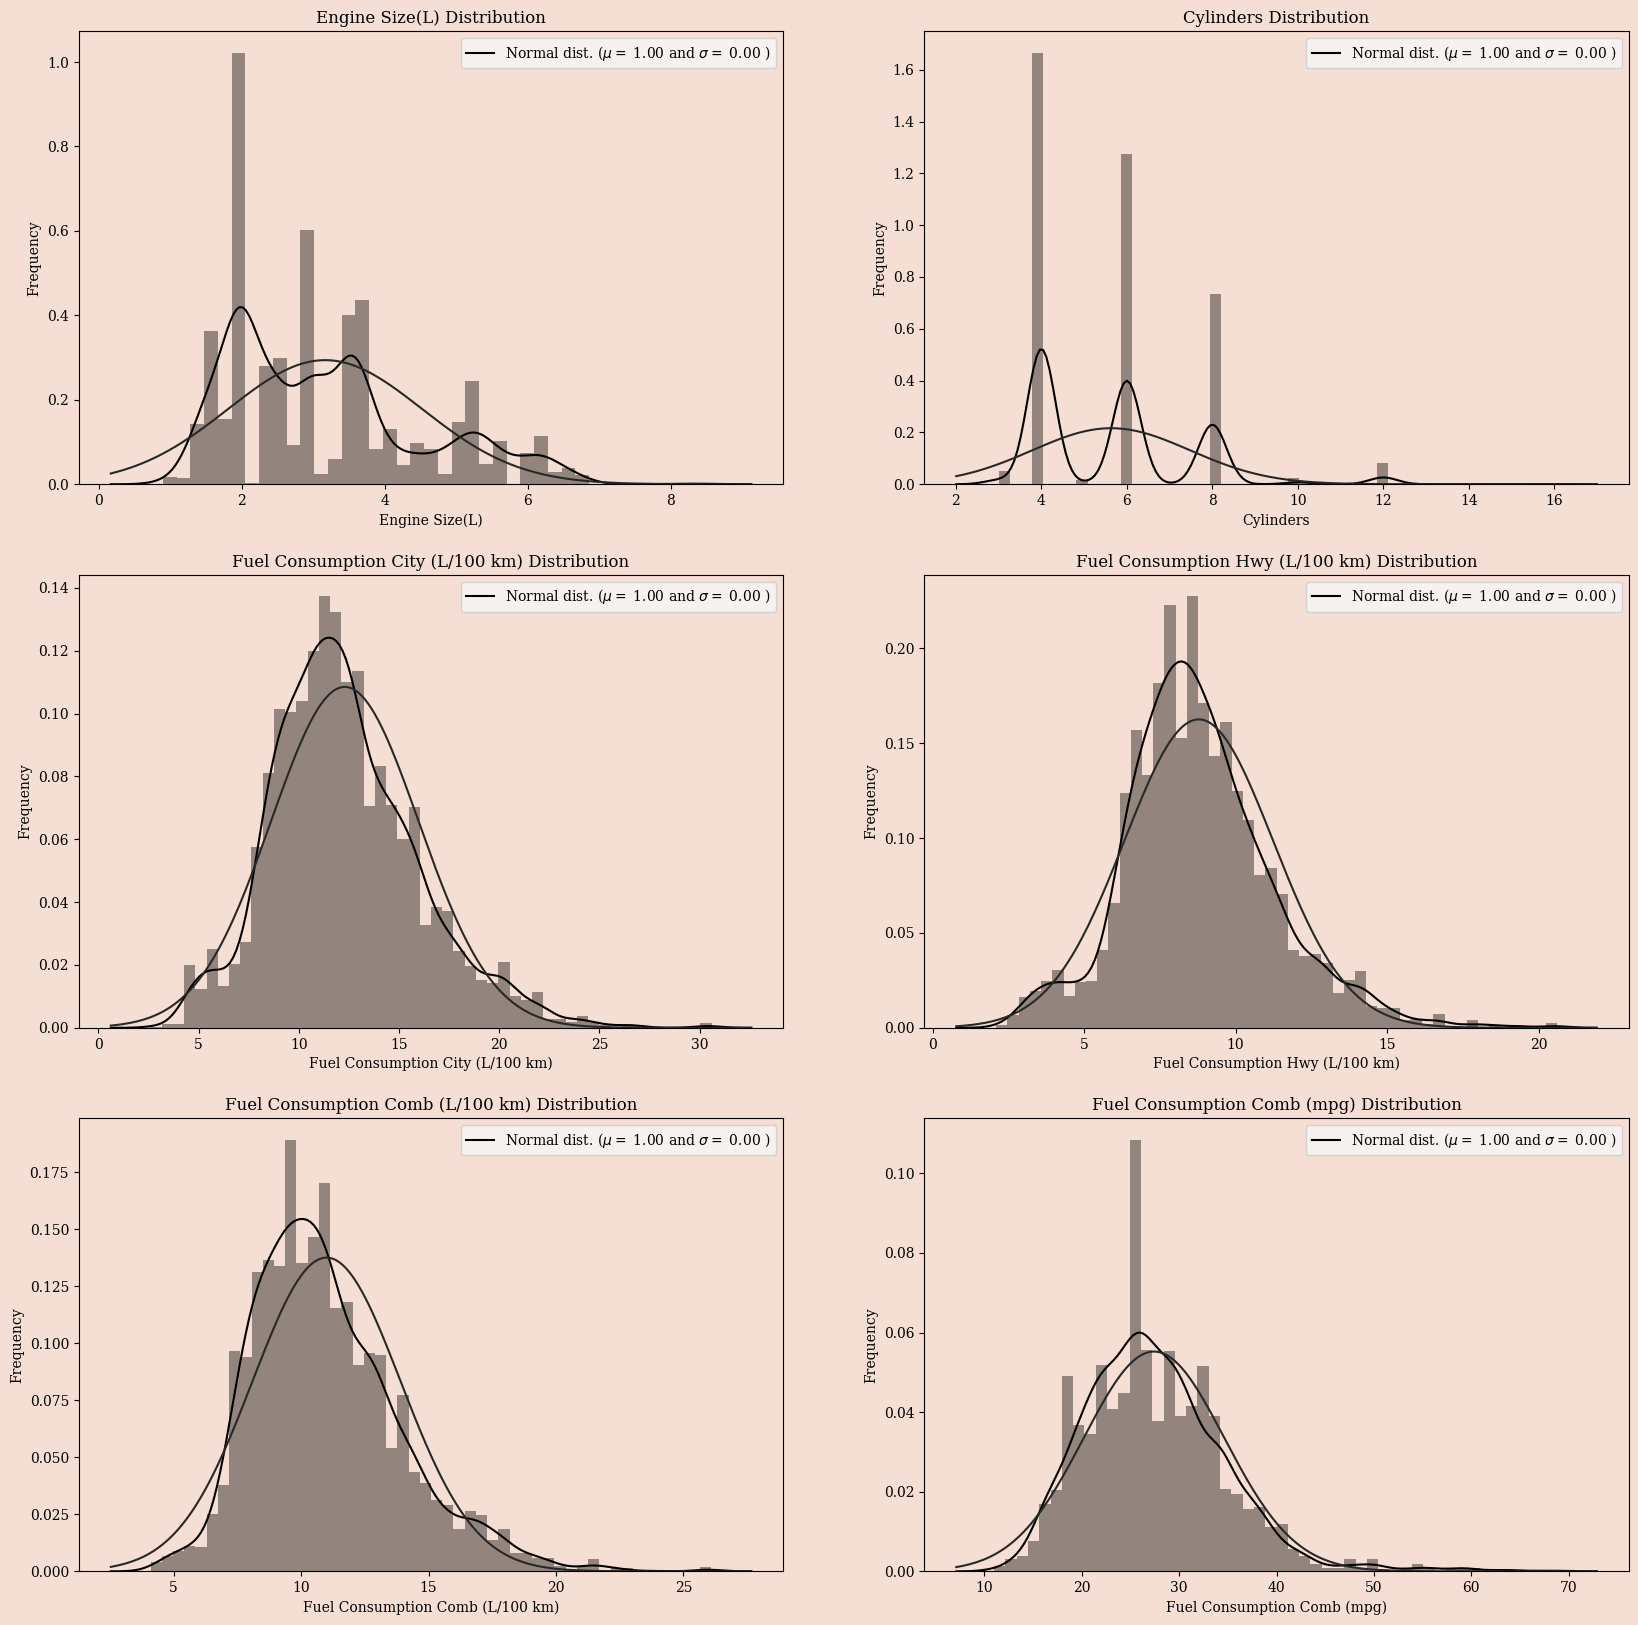

In [31]:
plt.figure(figsize = (20,20), facecolor='#f5ded3')

for index, feature in enumerate(num_features) :
    
    plt.subplot(3, 2, index + 1)
    #Check the new distribution
    ax = sns.distplot(train_imputed[feature] , fit=norm, color= 'black');

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train_imputed[feature].notna())

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    
    ax.set_facecolor('#f5ded3')
    ax.set(ylabel="Frequency")
    ax.set(xlabel=feature)
    ax.set(title=feature + ' Distribution')


### *Most of the features are skewed, let's fix it*

In [32]:
def handle_skew(df) :
    num_features = [feature for feature in df.columns if feature not in ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Cylinders', 'CO2 Emissions(g/km)']]
    skew_features = df[num_features].skew().sort_values(ascending=False)

    high_skew = skew_features[abs(skew_features) > 0.5]
    skewness = pd.DataFrame({'Skew' :high_skew})
    skewness.reset_index().rename(columns = {'index' : 'feature'})

    return skewness

def r2(df) :
    r2_scores = pd.DataFrame(index=("Original", "YeoJohnson", "Log", "Sqrt", "Boxcox"))
    for feature in handle_skew(df).T.columns :
        orig = df[feature].dropna()
        _, (*_, R_orig) = probplot(orig, rvalue=True)
        _, (*_, R_yeojohn) = probplot(yeojohnson(orig)[0], rvalue=True)
        _, (*_, R_log) = probplot(np.log1p(orig), rvalue=True)
        _, (*_, R_sqrt) = probplot(np.sqrt(orig), rvalue=True)
        _, (*_, R_boxcox) = probplot(boxcox1p(orig, boxcox_normmax(orig + 1)), rvalue=True)

        r2_scores[feature] = (
            R_orig * R_orig,
            R_yeojohn * R_yeojohn,
            R_log * R_log,
            R_sqrt * R_sqrt,
            R_boxcox * R_boxcox
        )

    r2_scores = r2_scores.transpose()
    r2_scores["Winner"] = r2_scores.idxmax(axis=1)

    return r2_scores

def transform(df) :
    copy = df.copy(deep = True)
    score = pd.DataFrame(r2(copy))
    for feature in score.index:
        winner = score.loc[feature, "Winner"]

        if winner == "Original":
            copy[feature] = copy[feature]

        elif winner == "YeoJohnson":
            copy[feature], _ = yeojohnson(copy[feature])

        elif winner == "Log":
            copy[feature] = np.log1p(copy[feature])

        elif winner == "Sqrt":
            copy[feature] = np.sqrt(copy[feature])

        elif winner == "Boxcox":
            copy[feature] = boxcox1p(copy[feature], boxcox_normmax(copy[feature] + 1))
            
        else:
            raise ValueError(f"Unknown winner transformation: {winner}")
            
    return copy

### *Check which are skewed*

In [33]:
handle_skew(train_imputed)

,Skew
Fuel Consumption Comb (mpg),0.98
Fuel Consumption Comb (L/100 km),0.88
Engine Size(L),0.81
Fuel Consumption City (L/100 km),0.66
Fuel Consumption Hwy (L/100 km),0.59


### *Best transformation to increase R2 Score*

In [34]:
r2(train_imputed)

,Original,YeoJohnson,Log,Sqrt,Boxcox,Winner
Fuel Consumption Comb (mpg),0.95,0.99,0.99,0.99,0.99,Boxcox
Fuel Consumption Comb (L/100 km),0.96,1.00,1.00,0.99,1.00,Boxcox
Engine Size(L),0.92,0.97,0.96,0.95,0.97,Boxcox
Fuel Consumption City (L/100 km),0.98,1.00,0.99,0.99,1.00,Boxcox
Fuel Consumption Hwy (L/100 km),0.98,0.99,0.98,0.99,0.99,Boxcox


### *Implementation*

In [35]:
train_skew = transform(train_imputed)

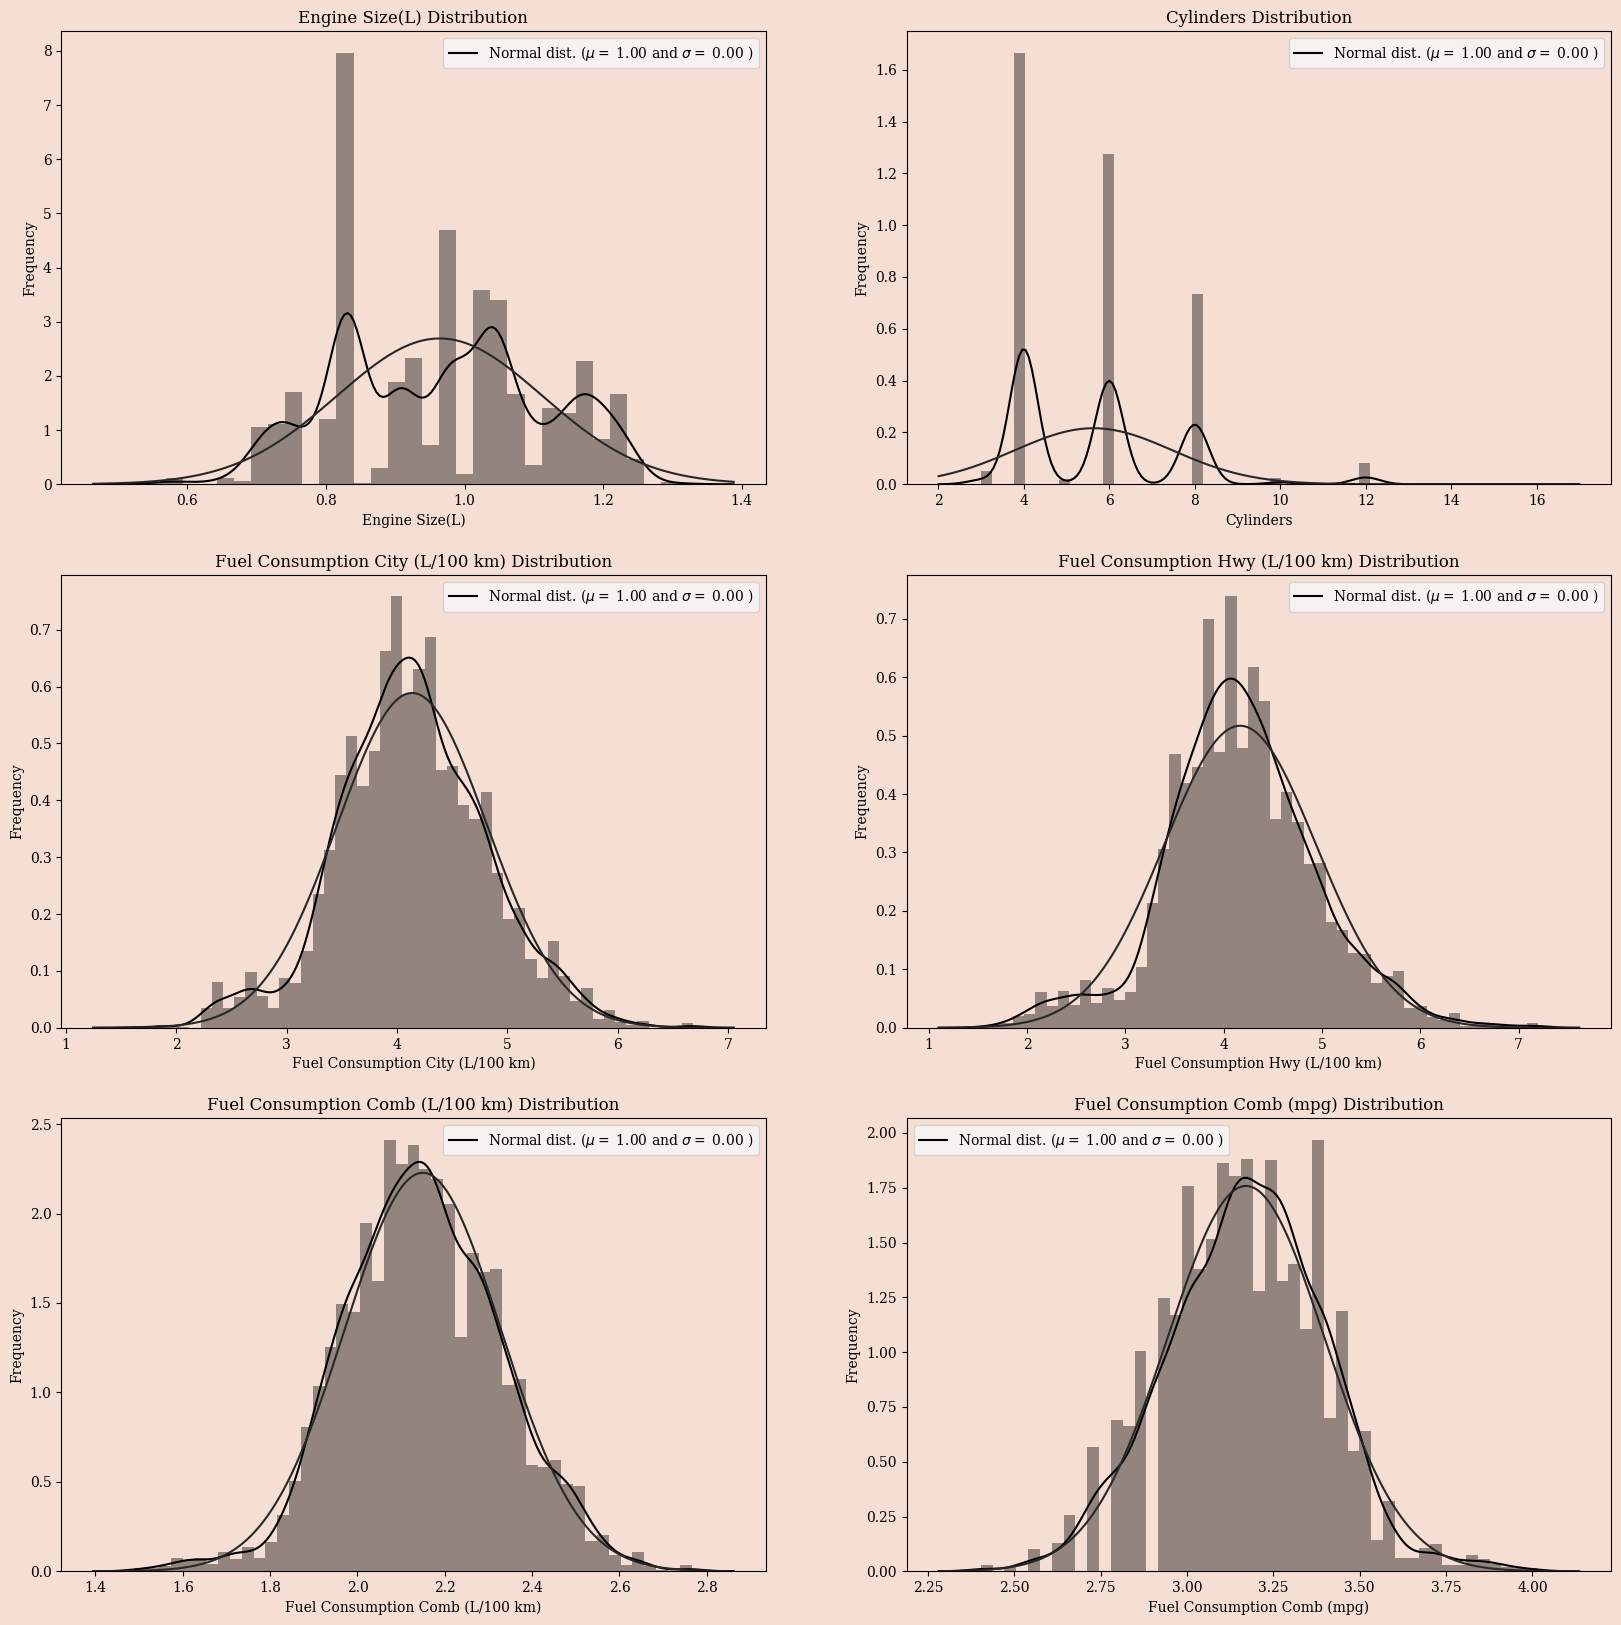

In [36]:
plt.figure(figsize = (20,20), facecolor='#f5ded3')

for index, feature in enumerate(num_features) :
    
    plt.subplot(3, 2, index + 1)
    #Check the new distribution
    ax = sns.distplot(train_skew[feature] , fit=norm, color= 'black');

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train_skew[feature].notna())

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    
    ax.set_facecolor('#f5ded3')
    ax.set(ylabel="Frequency")
    ax.set(xlabel=feature)
    ax.set(title=feature + ' Distribution')

### `cat_features`

In [37]:
def plot_countplot(df, feature, w, h, fs, space):
    # Set a figure with a taller height to accommodate labels
    plt.figure(figsize=(w, h), facecolor = '#f5ded3')  # Adjust the height to fit the vertical countplot

    # 2. Get sorted order of categories by count
    sorted_categories = df[feature].value_counts().index

    # 3. Plot the countplot sorted by count with horizontal bars
    ax = sns.countplot(df, y=feature, palette='flare', order=sorted_categories, width=0.8)
    ax.set_facecolor('#f5ded3')

    # 4. Calculate total counts for percentage
    total = len(df[feature])

    # 5. Add percentages next to each bar with extra space and smaller font
    for p in ax.patches:
        width = p.get_width()  # width is the count
        percentage = f'{100 * width / total:.2f}%'  # calculate percentage
        ax.text(width + space, p.get_y() + p.get_height() / 2., percentage,
                ha="center", va="center", fontsize=10)  # Adjust position for horizontal bars
        
    sns.despine(trim=True, left=True)

    # 6. Set y label rotation and adjust font size to avoid overlap
    plt.title(f'{feature} Count Distribution', fontsize=fs, fontweight='bold')
    plt.yticks(fontsize = fs)

    # Adjust layout
    plt.tight_layout()

# Example usage:
# plot_countplot(df, ['column1', 'column2'])


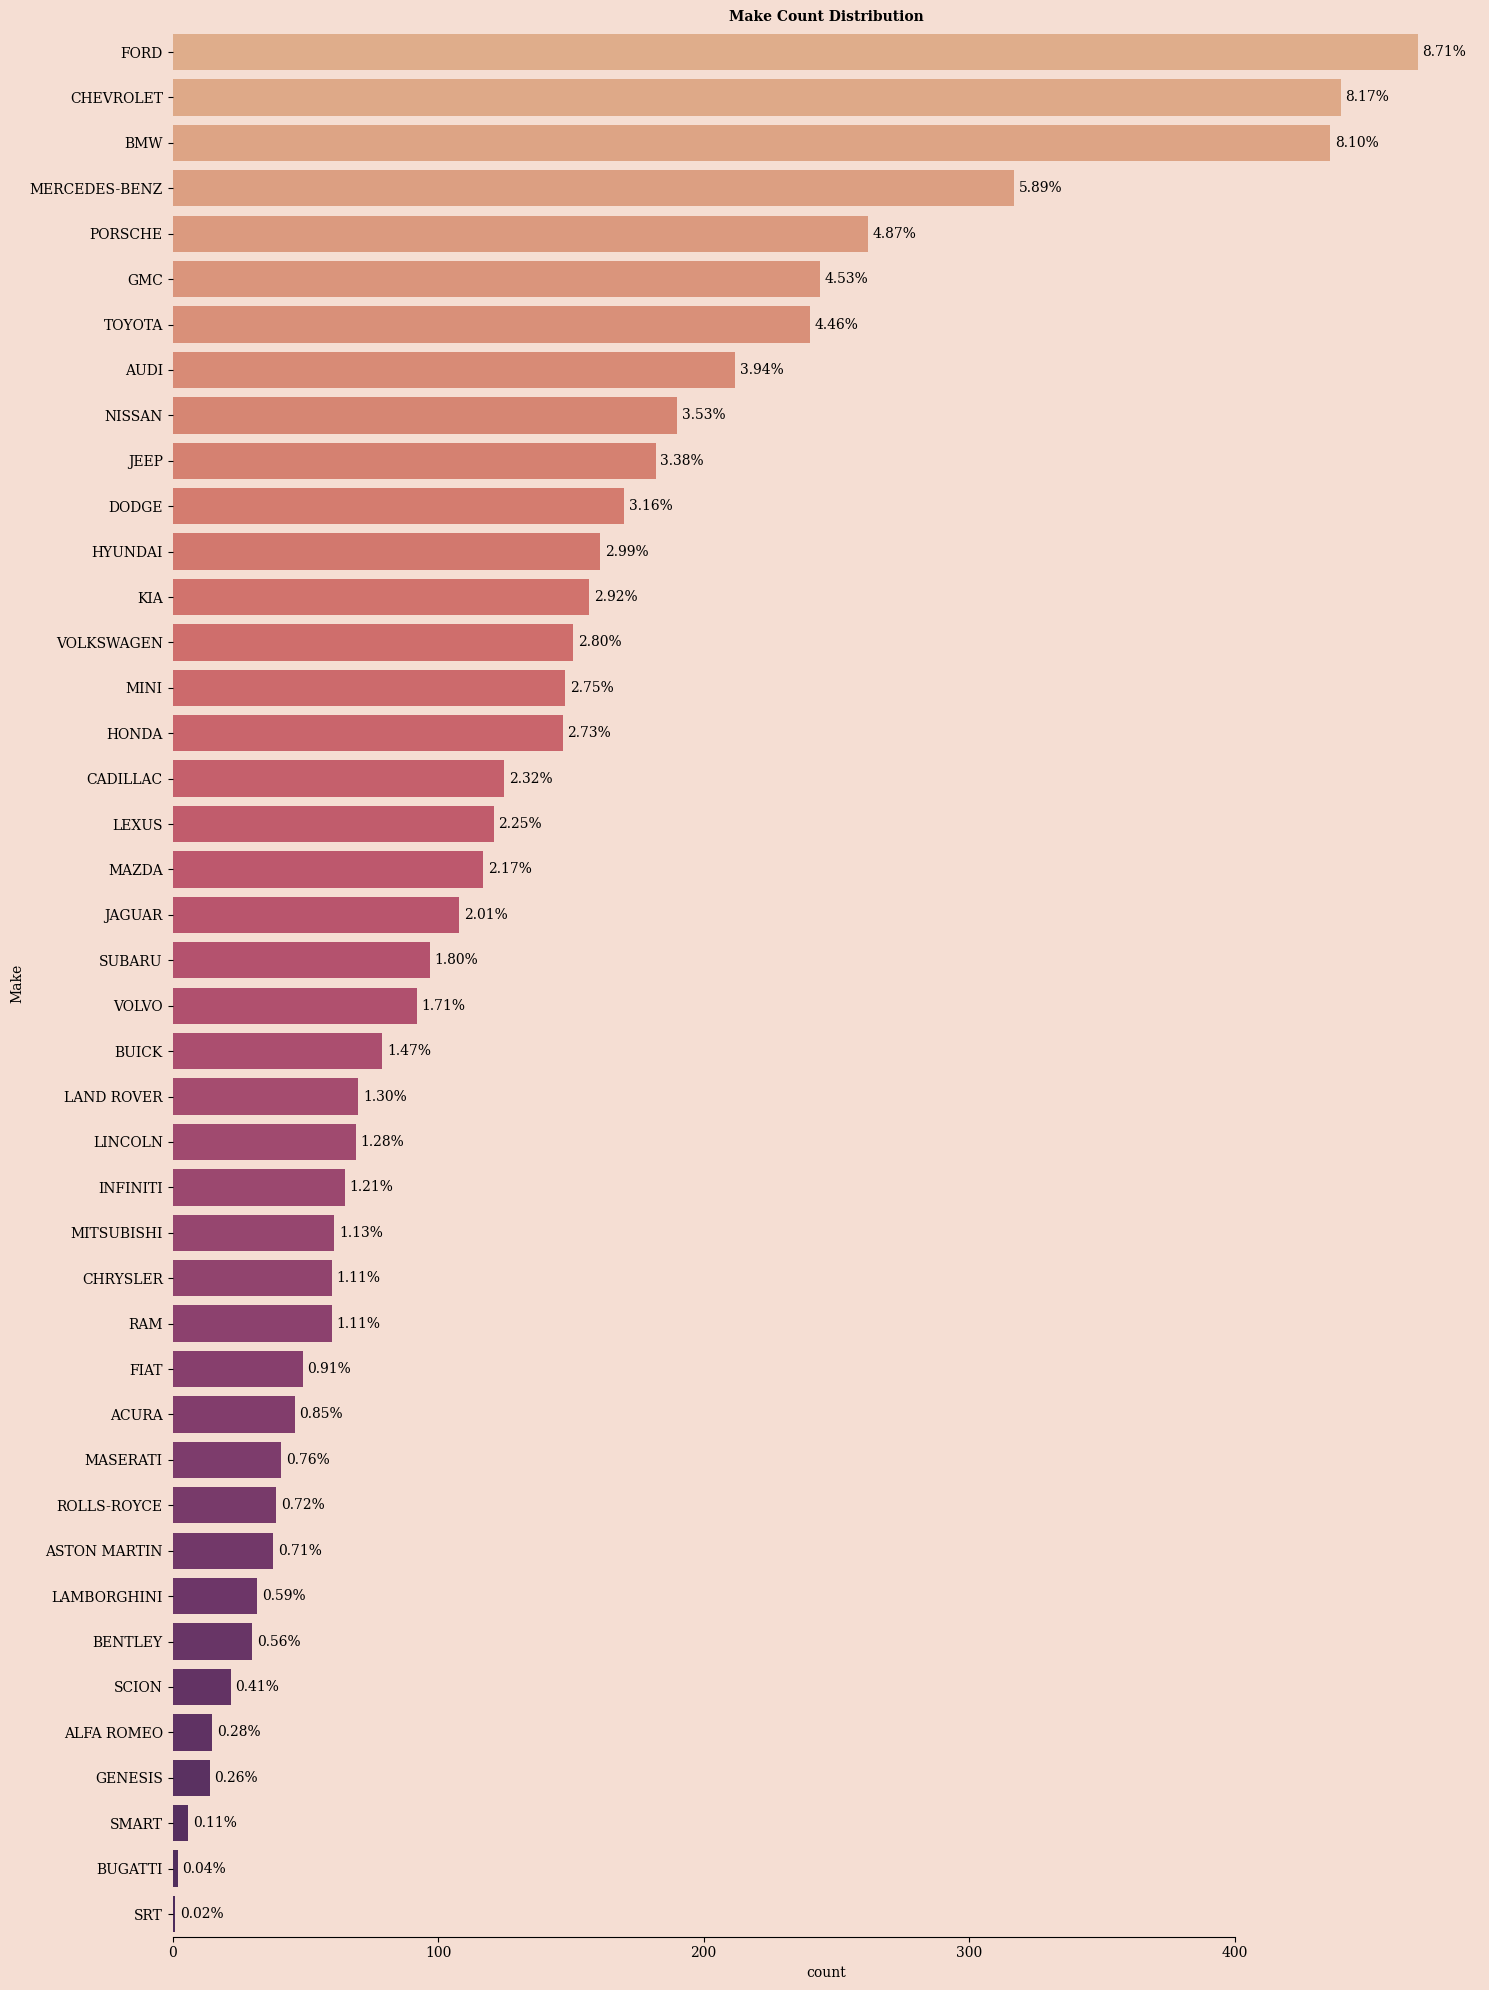

In [38]:
plot_countplot(train_imputed, 'Make', 15, 20, 10, 10)

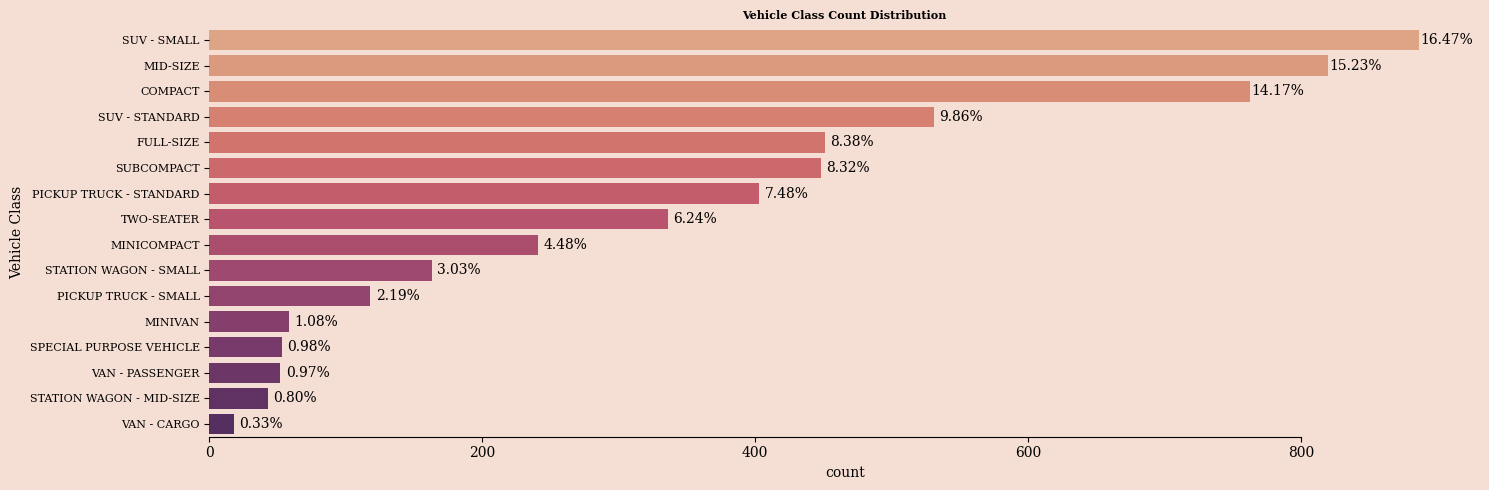

In [39]:
plot_countplot(train, 'Vehicle Class', 15, 5, 8, 20)

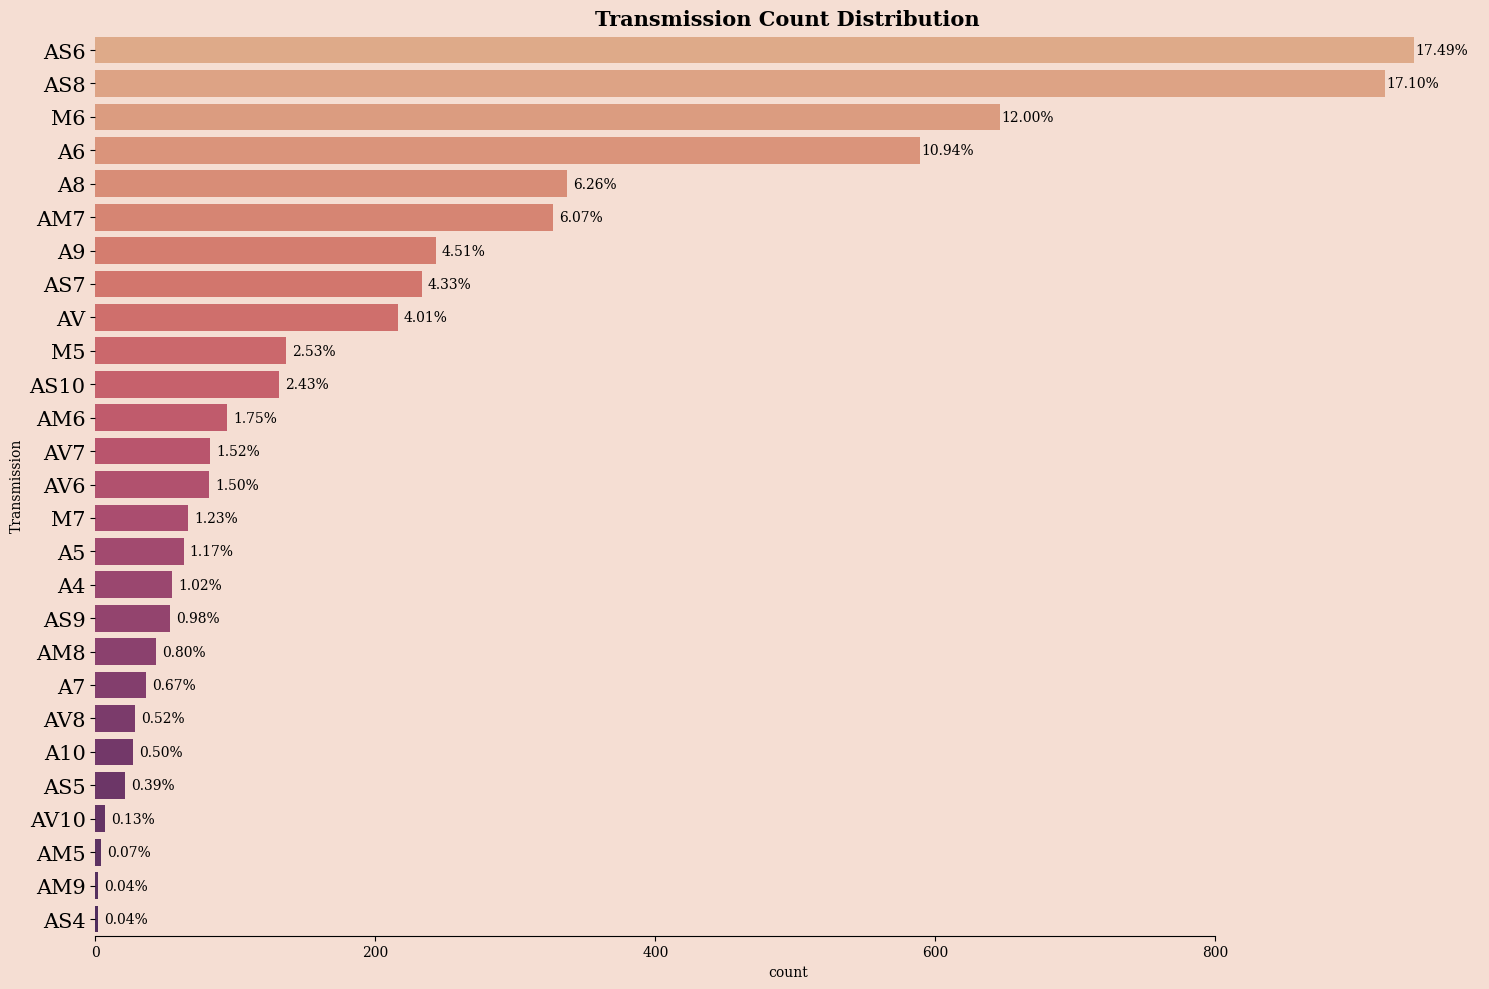

In [40]:
plot_countplot(train_imputed, 'Transmission', 15, 10, 15, 20)

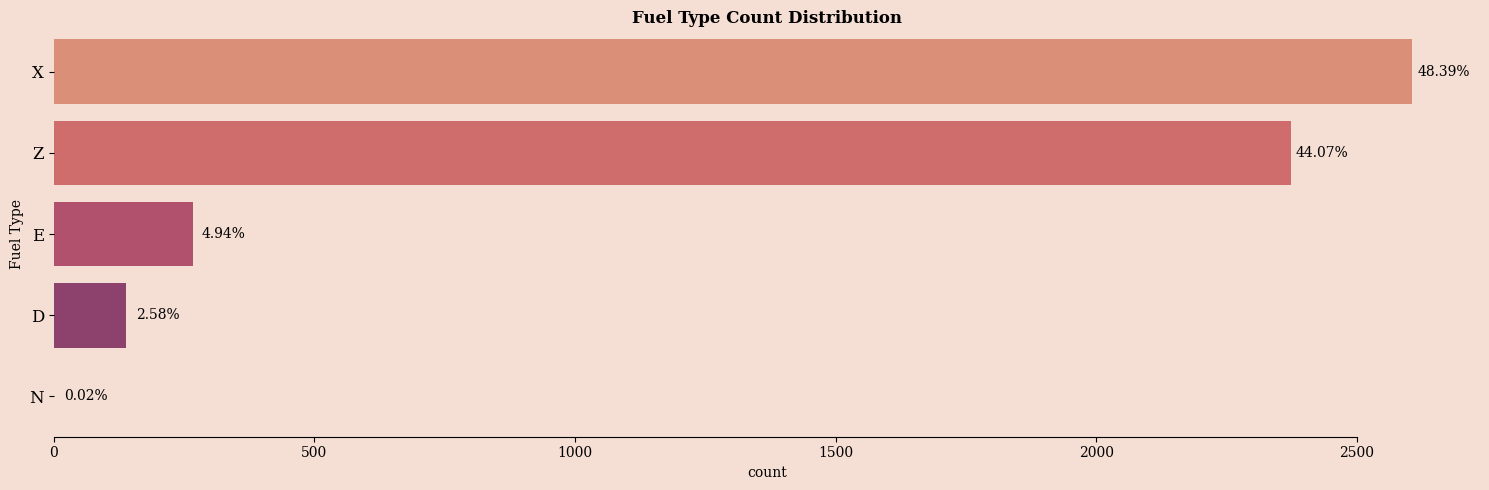

In [41]:
plot_countplot(train_imputed, 'Fuel Type', 15, 5, 12, 60)

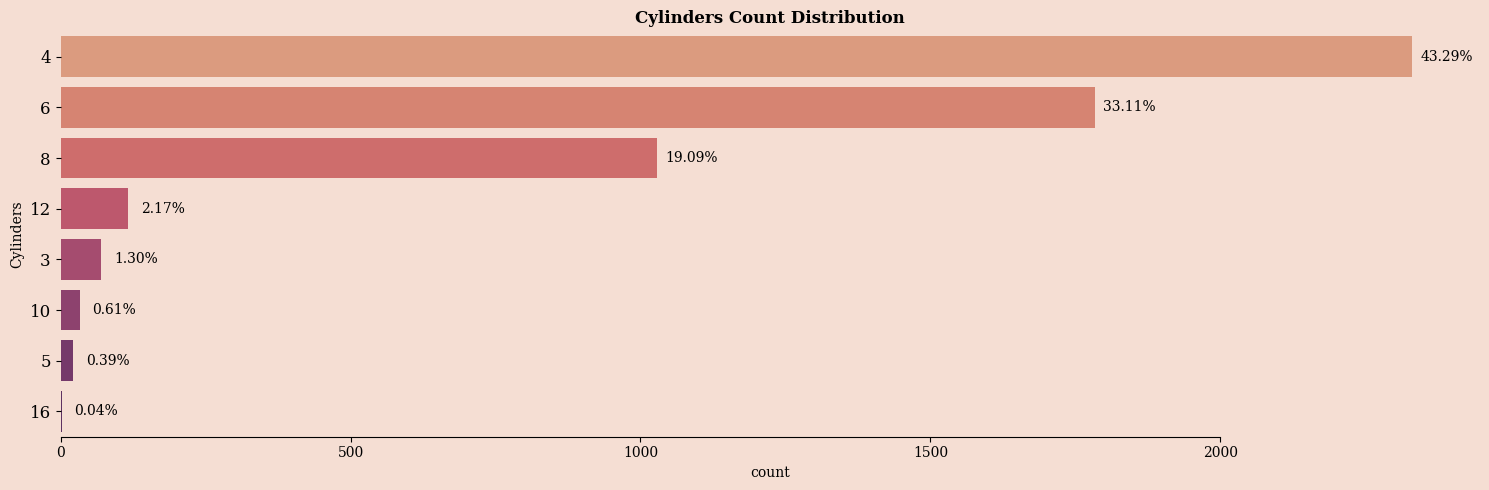

In [42]:
plot_countplot(train_imputed, 'Cylinders', 15, 5, 12, 60)

### 3. Outliers?

In [43]:
num_features.remove('Cylinders')

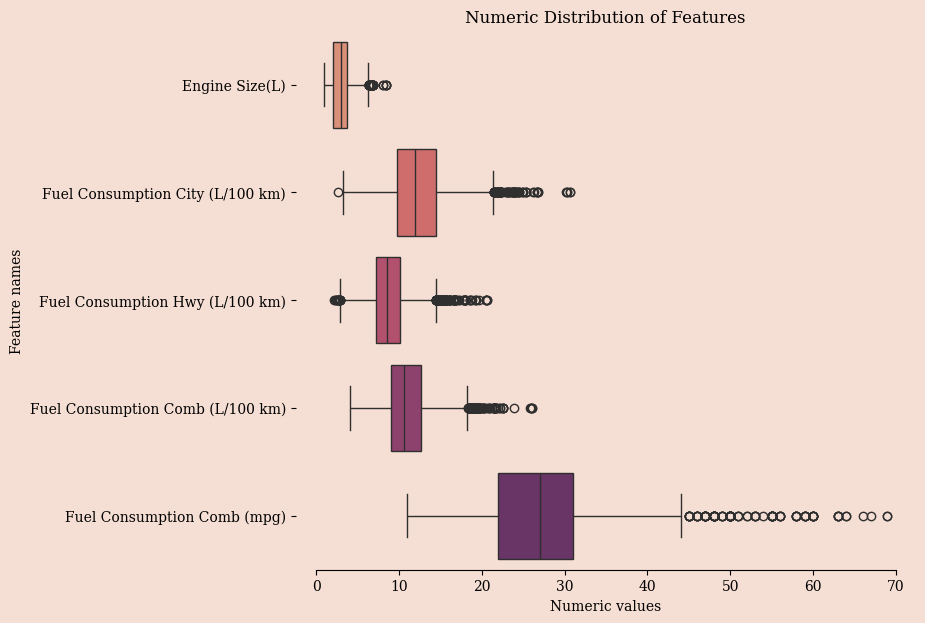

In [ ]:
f, ax = plt.subplots(figsize=(8, 7), facecolor='#f5ded3')
ax.set_facecolor('#f5ded3')
ax = sns.boxplot(data = train_imputed[num_features] , orient="h", palette='flare')
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

### *There's alot of outliers, let's fix it*

In [45]:
def check_outliers(df):
  outlier_features = []
  for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
      if df[i].max()>df[i].mean()+3*df[i].std() or df[i].min()<df[i].mean()-3*df[i].std():
        outlier_features.append(i)
  return outlier_features

def cap_outliers(df, outlier_features):
  for col in outlier_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
  return df

train_cap = cap_outliers(train_imputed, check_outliers(train_imputed))

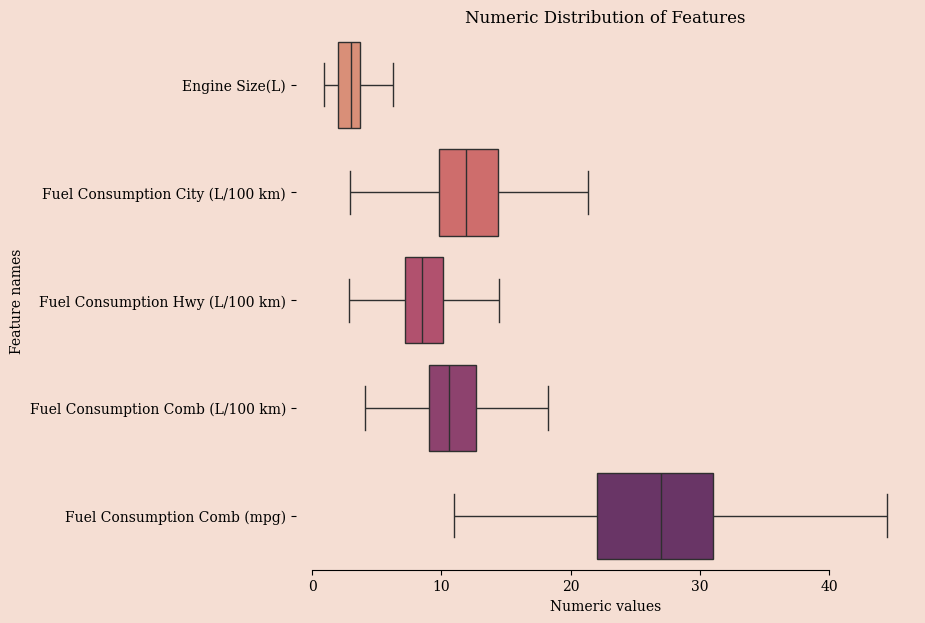

In [46]:
f, ax = plt.subplots(figsize=(8, 7), facecolor='#f5ded3')
ax.set_facecolor('#f5ded3')
ax = sns.boxplot(data = train_cap[num_features] , orient="h", palette='flare')
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

## *Pre-processing Summary*

In [47]:
def preprocessing(df) :
    df = fill_fuel(df)
    df = transform(df)
    df = cap_outliers(df, check_outliers(df))
    return df

---
# ~ Feature Engineering ~

In [48]:
train_cap.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.50,4.00,AS6,X,10.80,8.70,9.80,29.00,230.00
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40,8.00,M6,Z,16.20,10.90,13.80,20.00,324.00
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.50,6.00,A6,E,17.90,5.90,15.70,18.00,261.00
3,CADILLAC,ATS-V,COMPACT,3.60,6.00,AS8,Z,13.90,9.40,11.90,24.00,279.00
4,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.00,6.00,AS8,D,10.70,8.30,9.60,29.00,256.00


In [49]:
train_fe = train_cap.copy(deep = True)

### *Tokenization*

In [50]:
def tokenization(text):
    # Remove special characters
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")

    # Remove non-alphanumeric characters
    text = re.sub('[^a-zA-Z0-9]+\s*', ' ', text)

    # Remove single characters
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)

    # Remove multiple spaces
    text = text.replace(r'\s+', ' ')

    # Tokenize the text
    text = word_tokenize(text)
    
    return text

### 1. *Exract* `Model Type`

In [51]:
train_fe['Model Tokenize'] = train_fe['Model'].apply(tokenization)

In [52]:
def extract_mtype(row):
    types = ['4X4', '4WD', 'AWD', 'FFV', 'SWB', 'LWB', 'EWB']
    desc  = ['Four Wheel', 'Four Wheel', 'All Wheel', 'Flex Fuel', 'Short Wheel Base', 'Long Wheel Base', 'Extra Wheel Base']
    count = [0, 0, 0, 0, 0, 0, 0]
    for item in row:
        for index, value in enumerate(types):
            if item == value:
                if count[index] == 0:
                    count[index] += 1

    if sum(count) == 1:
        return desc[count.index(max(count))]
    
    elif sum(count) > 1:
        return 'Unique'
    
    else:
        return 'Unknown'

In [53]:
train_fe['Model Type'] = train_fe['Model Tokenize'].apply(lambda x: extract_mtype(x))

In [54]:
train_fe.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Model Tokenize,Model Type
0,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.50,4.00,AS6,X,10.80,8.70,9.80,29.00,230.00,"[CX, 5, Turbo, 4WD]",Four Wheel
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40,8.00,M6,Z,16.20,10.90,13.80,20.00,324.00,"[M6, CABRIOLET]",Unknown
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.50,6.00,A6,E,17.90,5.90,15.70,18.00,261.00,"[150, FFV]",Flex Fuel
3,CADILLAC,ATS-V,COMPACT,3.60,6.00,AS8,Z,13.90,9.40,11.90,24.00,279.00,[ATS],Unknown
4,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.00,6.00,AS8,D,10.70,8.30,9.60,29.00,256.00,"[Range, Rover, Sport, TD6, Diesel]",Unknown
5,BMW,535d xDRIVE,MID-SIZE,3.00,6.00,A8,D,9.20,6.40,7.90,36.00,213.00,"[535d, xDRIVE]",Unknown
6,HONDA,CIVIC,COMPACT,1.80,4.00,AV7,X,8.10,6.20,7.20,39.00,166.00,[CIVIC],Unknown
7,HONDA,HR-V AWD,STATION WAGON - SMALL,1.80,4.00,AV,X,8.90,7.50,8.20,34.00,194.00,"[HR, AWD]",All Wheel
8,JAGUAR,F-PACE 30t,SUV - SMALL,2.00,4.00,AS8,Z,10.90,8.70,9.90,29.00,232.00,"[PACE, 30t]",Unknown
9,JEEP,COMPASS,SUV - SMALL,2.40,4.00,M5,X,10.20,8.30,9.30,30.00,219.00,[COMPASS],Unknown


### 2.*Extract* `Transmission_Code` & `Gears`

In [55]:
def extract_tg(df):
    copy = df.copy(deep = True)

    # Extract the transmission code (prefix) using regex
    copy['Transmission Code'] = copy['Transmission'].str.extract(r'([A-Z]+)')
    
    # Extracting the number of gears using regex
    copy['Gears'] = copy['Transmission'].str.extract(r'(\d+)').astype(float)

    # Replace NaN values with 0
    copy['Gears'].fillna(0, inplace=True)

    # Convert to integer if desired
    copy['Gears'] = copy['Gears'].astype(int)

    return copy

In [56]:
train_fe = extract_tg(train_fe)
train_fe.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Model Tokenize,Model Type,Transmission Code,Gears
0,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.50,4.00,AS6,X,10.80,8.70,9.80,29.00,230.00,"[CX, 5, Turbo, 4WD]",Four Wheel,AS,6
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40,8.00,M6,Z,16.20,10.90,13.80,20.00,324.00,"[M6, CABRIOLET]",Unknown,M,6
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.50,6.00,A6,E,17.90,5.90,15.70,18.00,261.00,"[150, FFV]",Flex Fuel,A,6
3,CADILLAC,ATS-V,COMPACT,3.60,6.00,AS8,Z,13.90,9.40,11.90,24.00,279.00,[ATS],Unknown,AS,8
4,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.00,6.00,AS8,D,10.70,8.30,9.60,29.00,256.00,"[Range, Rover, Sport, TD6, Diesel]",Unknown,AS,8
5,BMW,535d xDRIVE,MID-SIZE,3.00,6.00,A8,D,9.20,6.40,7.90,36.00,213.00,"[535d, xDRIVE]",Unknown,A,8
6,HONDA,CIVIC,COMPACT,1.80,4.00,AV7,X,8.10,6.20,7.20,39.00,166.00,[CIVIC],Unknown,AV,7
7,HONDA,HR-V AWD,STATION WAGON - SMALL,1.80,4.00,AV,X,8.90,7.50,8.20,34.00,194.00,"[HR, AWD]",All Wheel,AV,0
8,JAGUAR,F-PACE 30t,SUV - SMALL,2.00,4.00,AS8,Z,10.90,8.70,9.90,29.00,232.00,"[PACE, 30t]",Unknown,AS,8
9,JEEP,COMPASS,SUV - SMALL,2.40,4.00,M5,X,10.20,8.30,9.30,30.00,219.00,[COMPASS],Unknown,M,5


### 3.*Extract* `Vehicle Class` & `Vehicle Size`

In [57]:
train_fe['Vehicle Tokenize'] = train_fe['Vehicle Class'].apply(tokenization)

In [58]:
def extract_vtype(row):
    cat = ['SUV', 'PICKUP', 'WAGON', 'MINIVAN', 'SPECIAL', 'VAN', 'TWO']

    for item in row:
        if item in cat:
            if item == 'TWO' :
                return 'SEDAN'
            
            else :
                return item
        
        else :
            return 'Unknown'

def extract_vsize(row) :
    size = ['SMALl', 'MID', 'STANDARD', 'FULL', 'TWO', 'COMPACT', 'MINICOMPACT', 'SUBCOMPACT', 'PASSENGER', 'CARGO']

    for item in row:
        if item in size:
            return item
        
        else :
            return 'Unknown'

In [59]:
train_fe['Vehicle Type'] = train_fe['Vehicle Tokenize'].apply(lambda x: extract_vtype(x))
train_fe['Vehicle Size'] = train_fe['Vehicle Tokenize'].apply(lambda x: extract_vsize(x))

In [60]:
train_fe.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Model Tokenize,Model Type,Transmission Code,Gears,Vehicle Tokenize,Vehicle Type,Vehicle Size
0,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.50,4.00,AS6,X,10.80,8.70,9.80,29.00,230.00,"[CX, 5, Turbo, 4WD]",Four Wheel,AS,6,"[SUV, SMALL]",SUV,Unknown
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40,8.00,M6,Z,16.20,10.90,13.80,20.00,324.00,"[M6, CABRIOLET]",Unknown,M,6,[SUBCOMPACT],Unknown,SUBCOMPACT
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.50,6.00,A6,E,17.90,5.90,15.70,18.00,261.00,"[150, FFV]",Flex Fuel,A,6,"[PICKUP, TRUCK, STANDARD]",PICKUP,Unknown
3,CADILLAC,ATS-V,COMPACT,3.60,6.00,AS8,Z,13.90,9.40,11.90,24.00,279.00,[ATS],Unknown,AS,8,[COMPACT],Unknown,COMPACT
4,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.00,6.00,AS8,D,10.70,8.30,9.60,29.00,256.00,"[Range, Rover, Sport, TD6, Diesel]",Unknown,AS,8,"[SUV, STANDARD]",SUV,Unknown
5,BMW,535d xDRIVE,MID-SIZE,3.00,6.00,A8,D,9.20,6.40,7.90,36.00,213.00,"[535d, xDRIVE]",Unknown,A,8,"[MID, SIZE]",Unknown,MID
6,HONDA,CIVIC,COMPACT,1.80,4.00,AV7,X,8.10,6.20,7.20,39.00,166.00,[CIVIC],Unknown,AV,7,[COMPACT],Unknown,COMPACT
7,HONDA,HR-V AWD,STATION WAGON - SMALL,1.80,4.00,AV,X,8.90,7.50,8.20,34.00,194.00,"[HR, AWD]",All Wheel,AV,0,"[STATION, WAGON, SMALL]",Unknown,Unknown
8,JAGUAR,F-PACE 30t,SUV - SMALL,2.00,4.00,AS8,Z,10.90,8.70,9.90,29.00,232.00,"[PACE, 30t]",Unknown,AS,8,"[SUV, SMALL]",SUV,Unknown
9,JEEP,COMPASS,SUV - SMALL,2.40,4.00,M5,X,10.20,8.30,9.30,30.00,219.00,[COMPASS],Unknown,M,5,"[SUV, SMALL]",SUV,Unknown


## 5. *Visualize New Features*

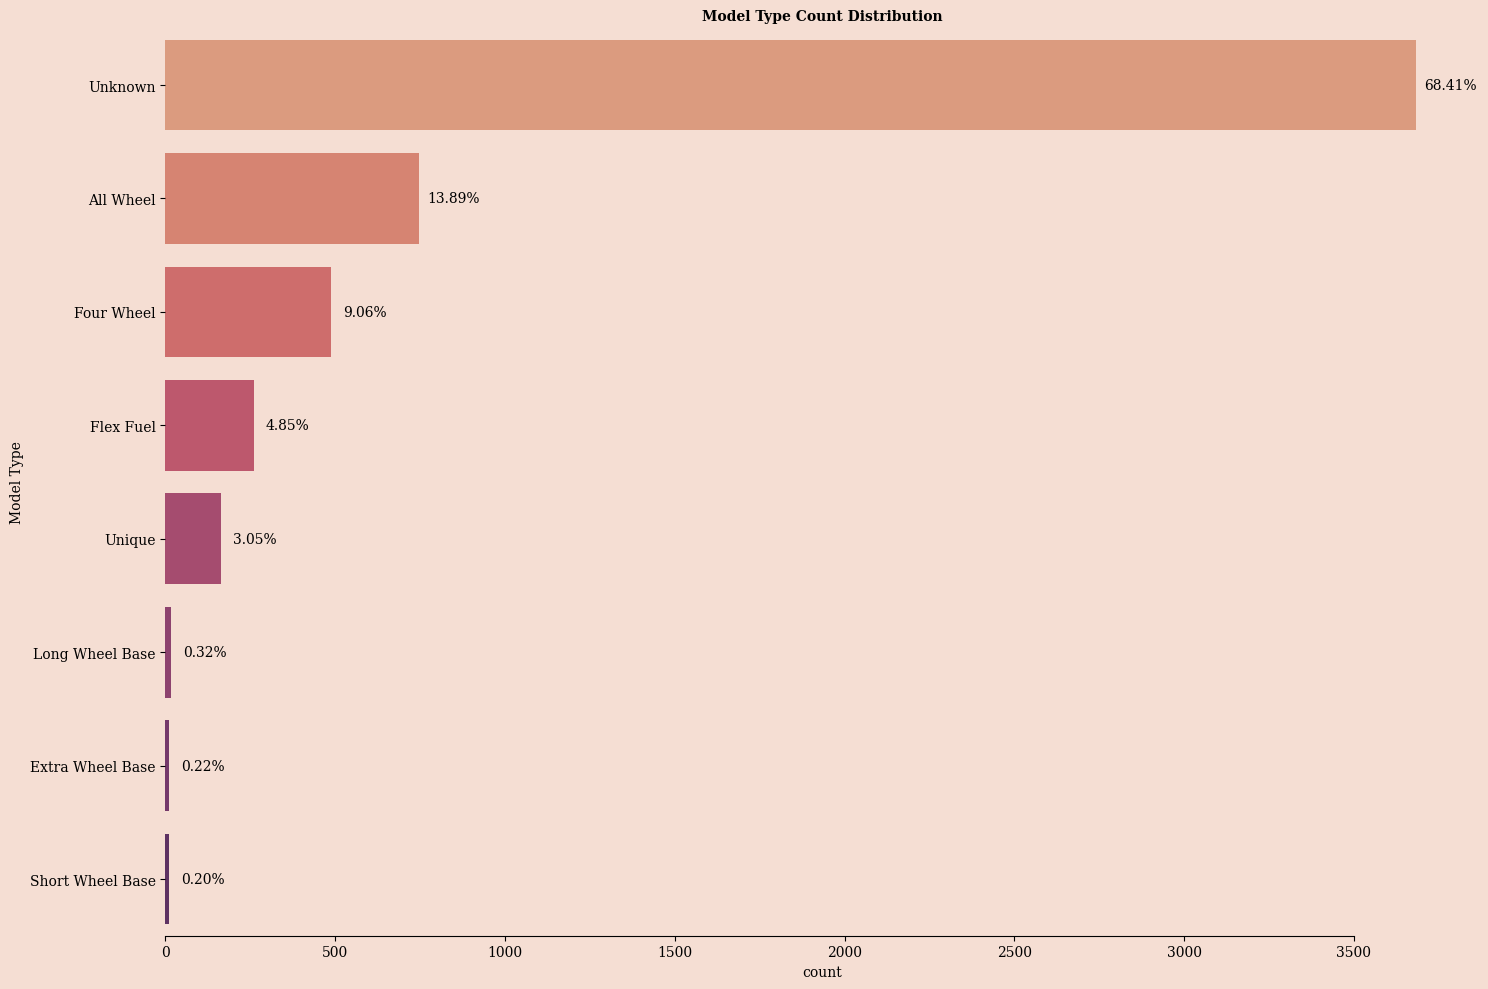

In [61]:
plot_countplot(train_fe, 'Model Type', 15, 10, 10, 100)

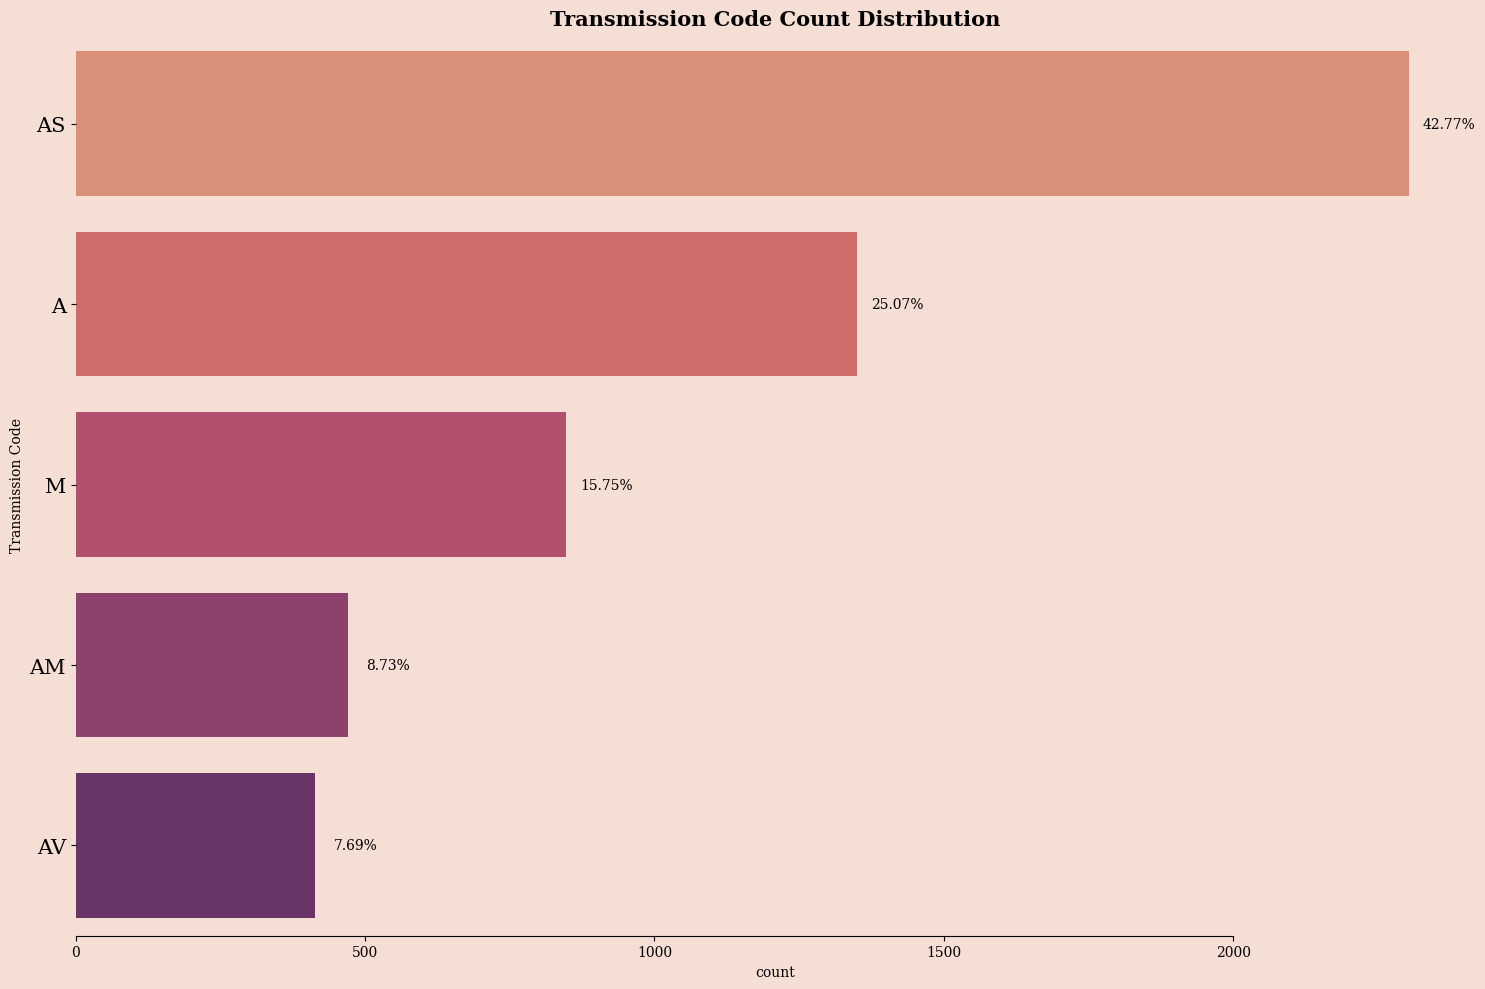

In [62]:
plot_countplot(train_fe, 'Transmission Code', 15, 10, 15, 70)

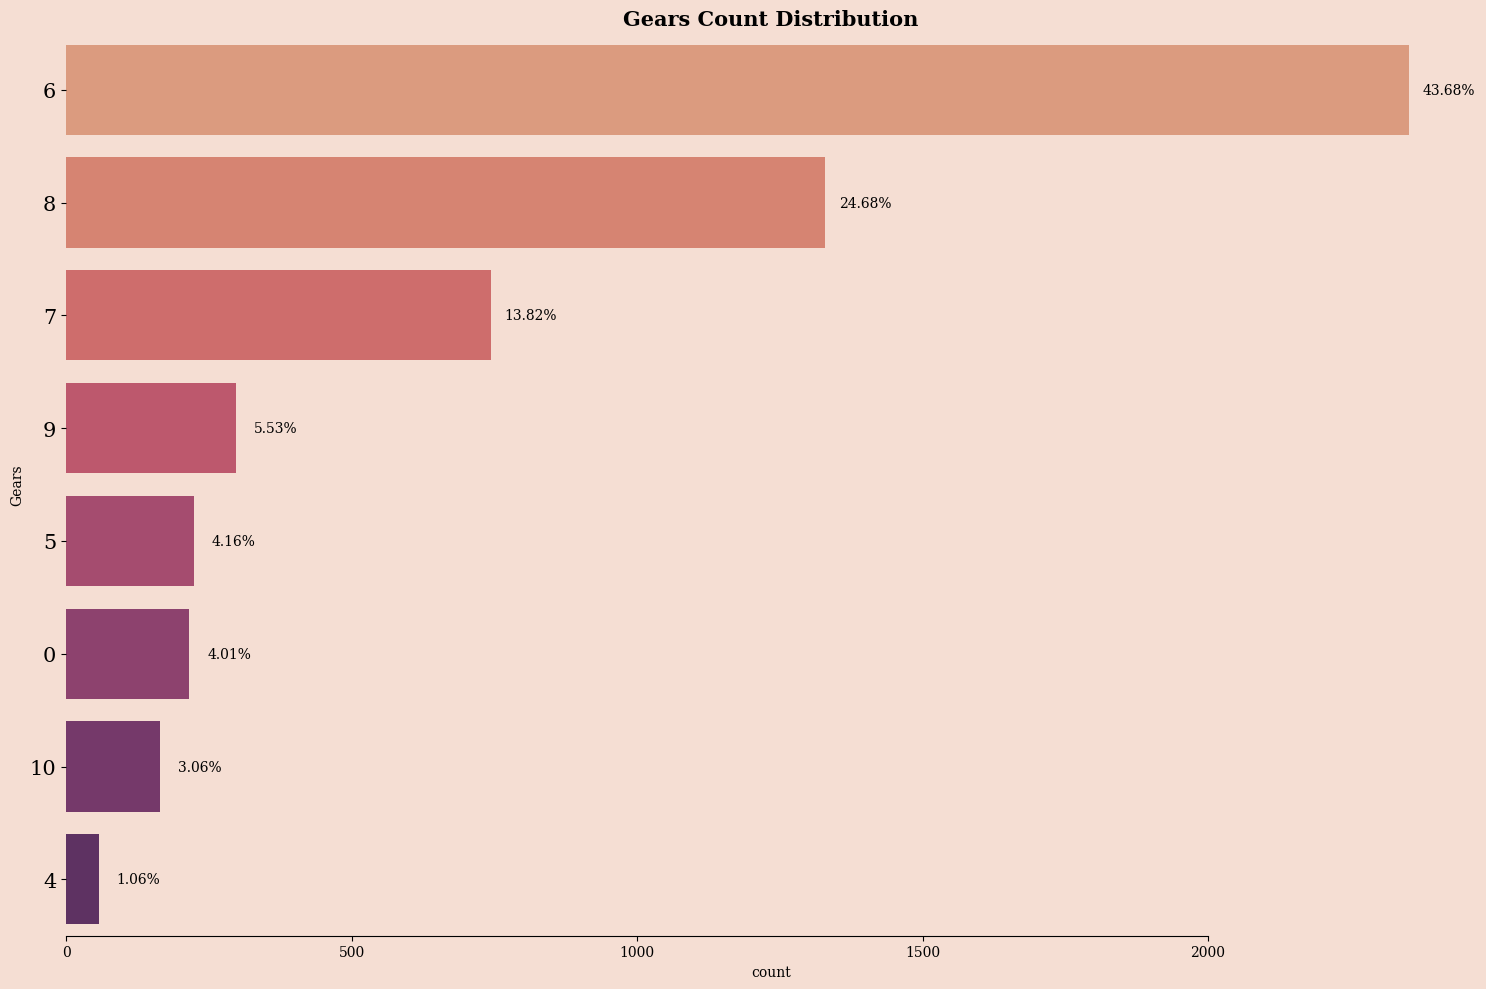

In [63]:
plot_countplot(train_fe, 'Gears', 15, 10, 15, 70)

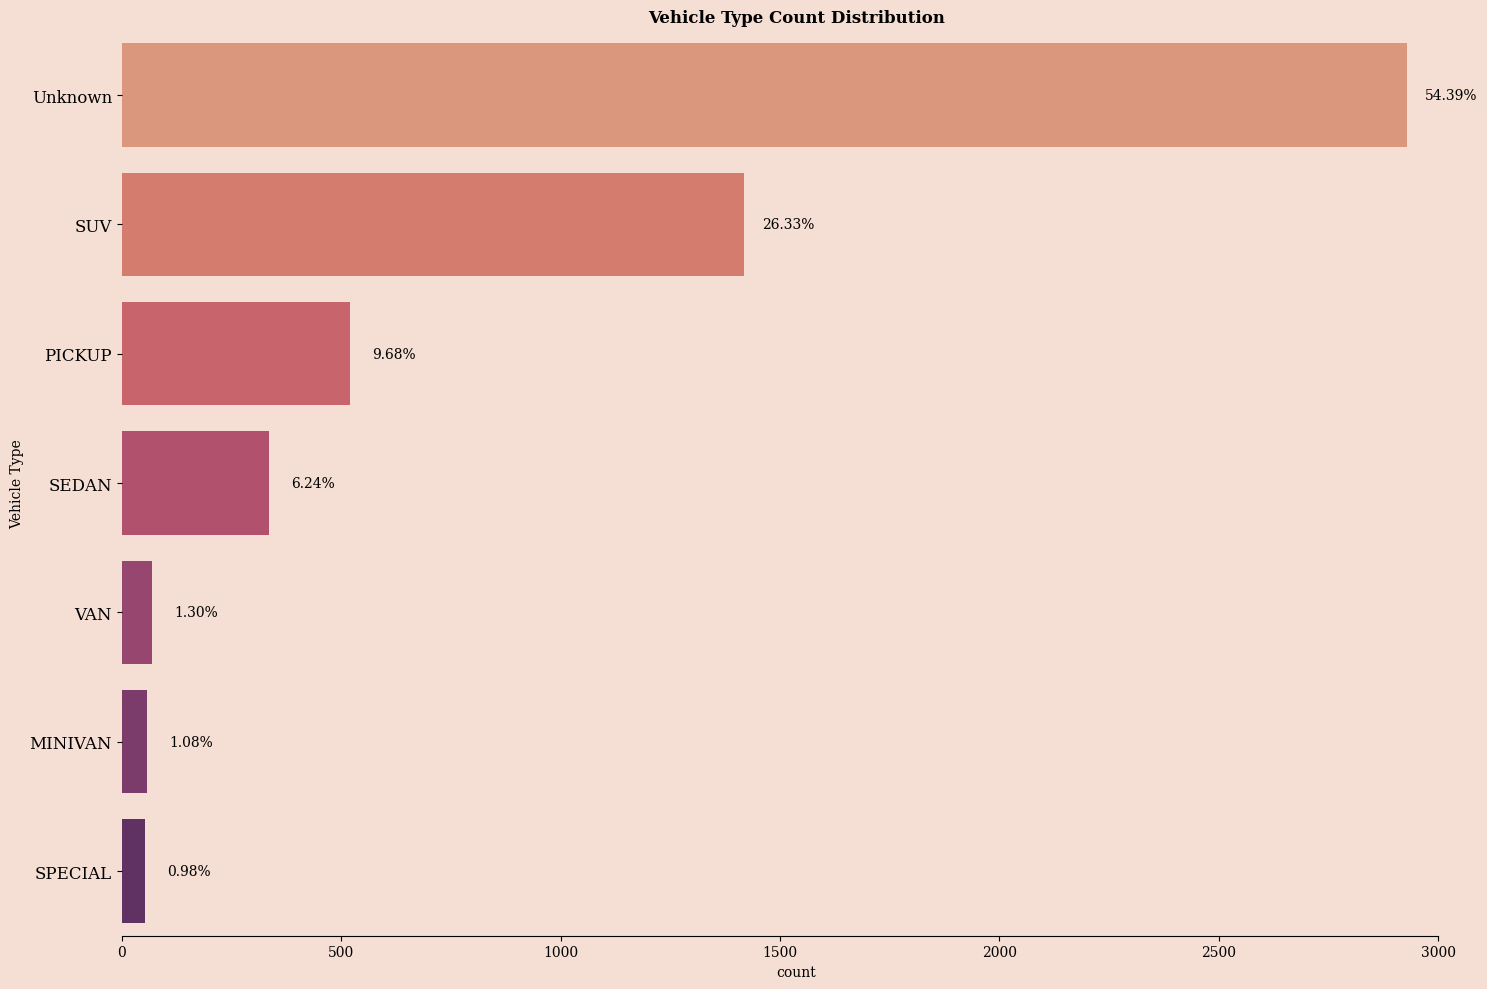

In [64]:
plot_countplot(train_fe, 'Vehicle Type', 15, 10, 12, 100)

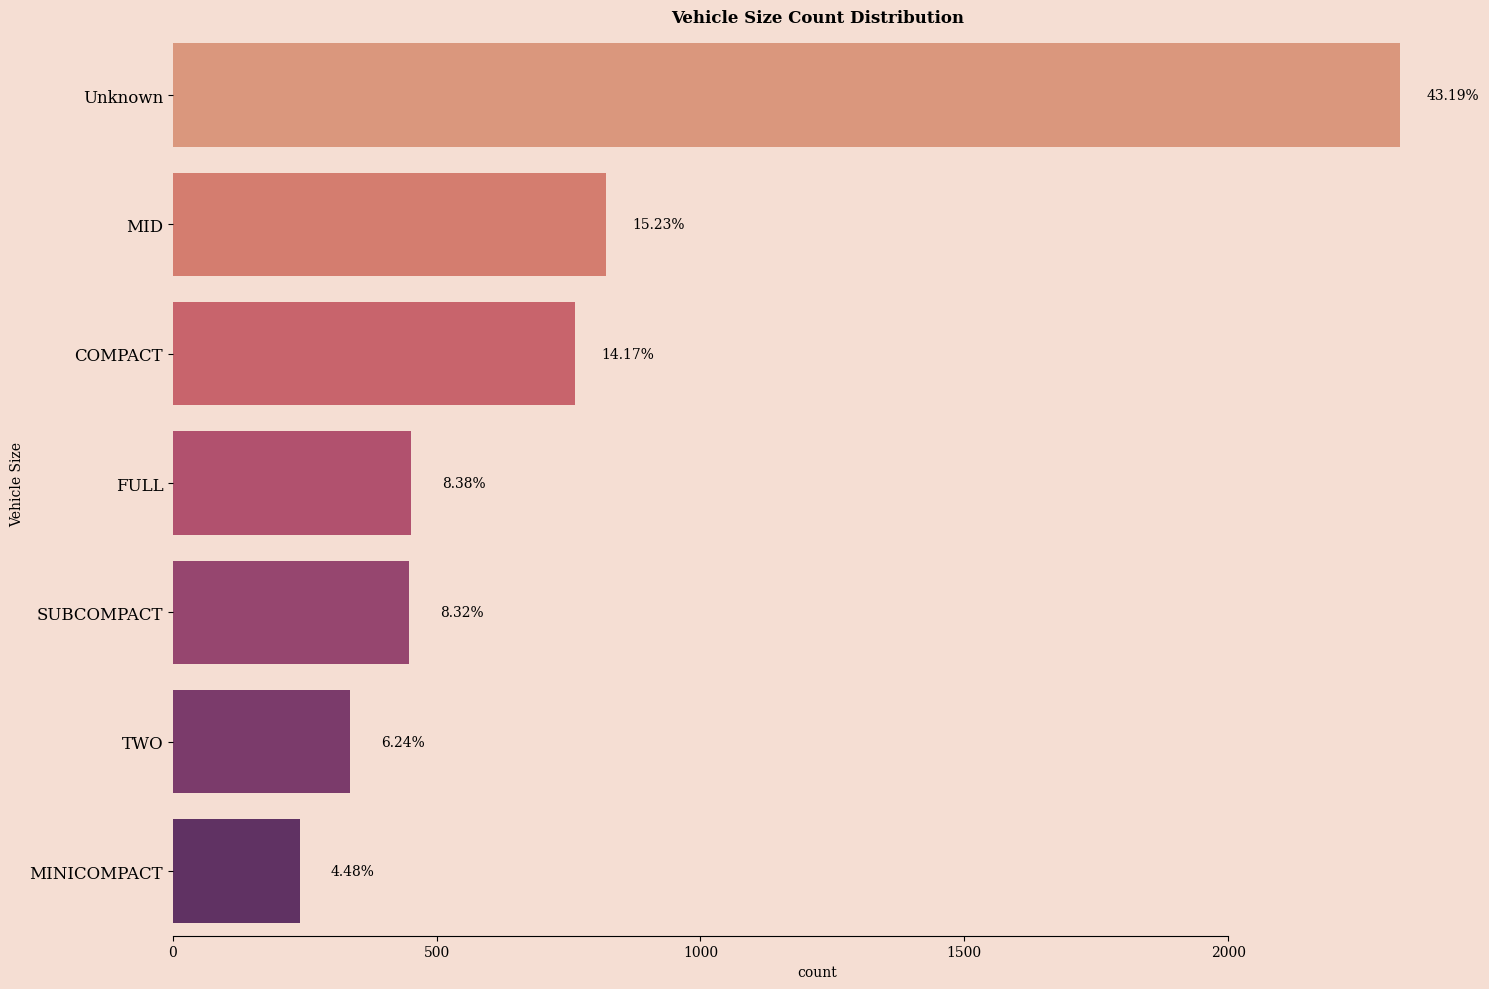

In [65]:
plot_countplot(train_fe, 'Vehicle Size', 15, 10, 12, 100)

## *6. Remove Tokenized Features*

In [66]:
def remove_unused(df) :
    copy = df.copy(deep = True)
    copy.drop(columns = ['Model Tokenize', 'Vehicle Tokenize'], inplace = True)

    return copy

In [67]:
train_fe = remove_unused(train_fe)

In [68]:
train_fe.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Model Type,Transmission Code,Gears,Vehicle Type,Vehicle Size
0,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.50,4.00,AS6,X,10.80,8.70,9.80,29.00,230.00,Four Wheel,AS,6,SUV,Unknown
1,BMW,M6 CABRIOLET,SUBCOMPACT,4.40,8.00,M6,Z,16.20,10.90,13.80,20.00,324.00,Unknown,M,6,Unknown,SUBCOMPACT
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.50,6.00,A6,E,17.90,5.90,15.70,18.00,261.00,Flex Fuel,A,6,PICKUP,Unknown
3,CADILLAC,ATS-V,COMPACT,3.60,6.00,AS8,Z,13.90,9.40,11.90,24.00,279.00,Unknown,AS,8,Unknown,COMPACT
4,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.00,6.00,AS8,D,10.70,8.30,9.60,29.00,256.00,Unknown,AS,8,SUV,Unknown


## 7. *Label Encoding*

In [69]:
cat_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Model Type', 'Transmission Code', 'Vehicle Type', 'Vehicle Size', 'Fuel Type']

def le(df):
    copy = df.copy(deep = True)

    for cat in cat_features:
        copy[cat] = LabelEncoder().fit_transform(copy[cat])

    return copy

## 7. *Feature Selection & Multicorr*

In [70]:
CO2 = train_fe['CO2 Emissions(g/km)']
train_fe.drop(columns = 'CO2 Emissions(g/km)', inplace = True)
train_fe['CO2 Emissions(g/km)'] = CO2

In [71]:
cat_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Model Type', 'Transmission Code', 'Vehicle Type', 'Vehicle Size', 'Fuel Type']

In [72]:
def mask_corr_matrix(df, p, t):
    plt.figure(figsize = (p,t), facecolor='#f5ded3')
    # Encode target column
    temp = df.copy(deep = True)

    for cat in cat_features :
        temp[cat] = LabelEncoder().fit_transform(temp[cat])
        
    # Take correlation between all columns with threshold 0.5
    corr = temp.corr()

    # Set mask with filter by the threshold and 
    filter = np.zeros_like(corr, dtype=bool)

    # Set also mask with half of the matrix
    half = np.triu(np.ones_like(corr, dtype=bool))
    filter[np.abs(corr) < 0.5] = True
    filter[-1, 0:-1] = False

    # Set font scale
    sns.set_context("notebook", font_scale=0.8)
    
    # Plot heatmap
    heatmap = sns.heatmap(corr, mask = filter | half, annot=True, fmt=".3f", cmap = 'flare', linewidths=0.2, xticklabels=True, yticklabels=True)
    
    # Set title
    title = heatmap.set_title("High Correlation & Target Heatmap", weight='bold', size=16)
    title.set_position([0.45, 1.1])
    heatmap.set_facecolor('#f5ded3')
    
    # Rotate xticks and yticks
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

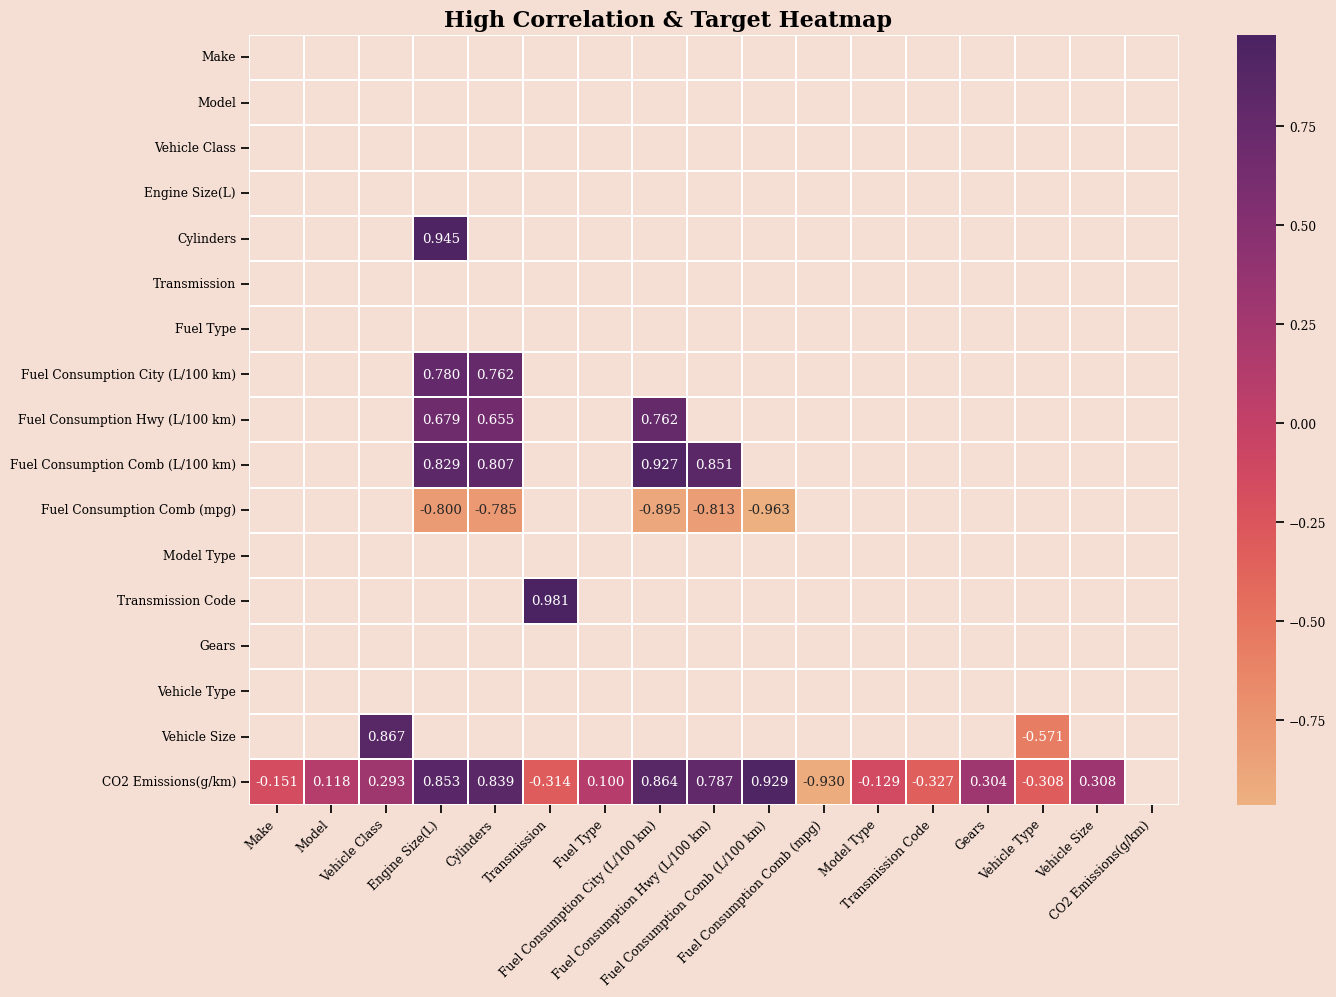

In [73]:
mask_corr_matrix(train_fe, 15, 10)

In [74]:
fs = ['Model', 'Vehicle Class', 'Transmission']
multicorr = ['Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']

In [75]:
def feature_selection(df) :
    copy = df.copy(deep = True)
    copy.drop(columns = fs, inplace = True)

    return copy

def multi_corr(df) :
    copy = df.copy(deep = True)
    copy.drop(columns = multicorr, inplace = True)

    return copy

### *Decided to use fs only, dropping multicorrr yields lower score*

In [76]:
train_fs = feature_selection(train_fe)

In [77]:
train_fs

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Model Type,Transmission Code,Gears,Vehicle Type,Vehicle Size,CO2 Emissions(g/km)
0,MAZDA,2.50,4.00,X,10.80,8.70,9.80,29.00,Four Wheel,AS,6,SUV,Unknown,230.00
1,BMW,4.40,8.00,Z,16.20,10.90,13.80,20.00,Unknown,M,6,Unknown,SUBCOMPACT,324.00
2,FORD,3.50,6.00,E,17.90,5.90,15.70,18.00,Flex Fuel,A,6,PICKUP,Unknown,261.00
3,CADILLAC,3.60,6.00,Z,13.90,9.40,11.90,24.00,Unknown,AS,8,Unknown,COMPACT,279.00
4,LAND ROVER,3.00,6.00,D,10.70,8.30,9.60,29.00,Unknown,AS,8,SUV,Unknown,256.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,CHEVROLET,5.30,8.00,X,9.30,11.30,14.40,20.00,Four Wheel,A,6,SUV,Unknown,337.00
5904,HYUNDAI,1.80,4.00,X,4.80,6.40,7.70,37.00,Unknown,M,6,Unknown,MID,180.00
5905,FORD,3.50,6.00,X,14.30,10.50,12.50,23.00,Four Wheel,AS,10,PICKUP,Unknown,295.00
5906,MERCEDES-BENZ,4.00,8.00,Z,13.80,4.50,12.10,23.00,Unknown,A,7,Unknown,SUBCOMPACT,285.00


### *FE Summary*

In [78]:
def fe(df) :
    
    df = extract_tg(df)
    df['Model Tokenize'] = df['Model'].apply(tokenization)
    df['Model Type'] = df['Model Tokenize'].apply(lambda x: extract_mtype(x))
    df['Vehicle Tokenize'] = df['Vehicle Class'].apply(tokenization)
    df['Vehicle Type'] = df['Vehicle Tokenize'].apply(lambda x: extract_vtype(x))
    df['Vehicle Size'] = df['Vehicle Tokenize'].apply(lambda x: extract_vsize(x))
    df = remove_unused(df)
    df = le(df)
    df = feature_selection(df)

    return df

---
# ~ Modelling, Evaluation, Submission ~

### *Get Data Ready*

In [79]:
def process_data(df):
    copy = df.copy(deep = True)
    copy = preprocessing(copy)
    copy = fe(copy)
    copy['Cylinders'] = copy['Cylinders'].astype(int)
    return copy

In [80]:
combined = pd.concat([train.drop(columns = 'CO2 Emissions(g/km)'), test], axis = 0)
combined = process_data(combined)

train_ready = combined[:train.shape[0]]
test_ready  = combined[train.shape[0]:]

In [81]:
train_ready['CO2 Emissions(g/km)'] = train['CO2 Emissions(g/km)']

In [82]:
train_ready

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Transmission Code,Gears,Model Type,Vehicle Type,Vehicle Size,CO2 Emissions(g/km)
0,27,0.91,4,3,3.77,4.06,2.04,3.36,2,6,3,4,6,230
1,5,1.11,8,4,4.66,4.69,2.27,3.01,4,6,7,5,4,324
2,13,1.03,6,1,4.90,3.15,2.35,2.91,0,6,2,1,6,261
3,8,1.04,6,4,4.31,4.27,2.17,3.18,2,8,7,5,0,279
4,23,0.98,6,0,3.75,3.94,2.03,3.36,2,8,7,4,6,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,9,1.17,8,3,3.48,4.80,2.30,3.01,0,6,3,4,6,337
5904,17,0.79,4,3,2.37,3.32,1.88,3.59,4,6,7,5,2,180
5905,13,1.03,6,3,4.37,4.58,2.20,3.14,2,10,3,1,6,295
5906,28,1.08,8,4,4.29,2.61,2.18,3.14,0,7,7,5,4,285


In [83]:
test_ready

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Transmission Code,Gears,Model Type,Vehicle Type,Vehicle Size
0,9,0.72,4,3,3.35,3.29,1.87,3.59,0,6,7,5,2
1,25,0.83,4,3,2.63,3.25,1.71,3.84,3,0,7,5,2
2,39,0.98,6,4,3.60,3.76,1.98,3.45,2,8,7,2,5
3,13,1.22,8,3,5.23,5.71,2.44,2.80,2,6,3,1,6
4,8,1.04,6,3,4.01,4.03,2.09,3.29,2,8,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,28,1.08,8,4,4.48,4.69,2.24,3.06,0,9,7,4,6
1473,2,1.21,9,4,5.11,5.18,2.39,2.86,1,7,7,2,5
1474,21,0.83,4,3,3.58,3.53,1.95,3.48,4,6,7,5,1
1475,9,1.04,6,3,4.45,4.41,2.22,3.10,0,6,0,4,6


### *Label Encoding*

In [84]:
cat_features = ['Make', 'Fuel Type', 'Transmission Code', 'Model Type', 'Vehicle Type', 'Vehicle Size']

In [85]:
combine = pd.concat([train_ready.drop(columns = 'CO2 Emissions(g/km)'), test_ready], axis = 0)
le = LabelEncoder()

for cat in cat_features:
    combine[cat] = le.fit_transform(combine[cat])

train_ready[cat_features] = combine[cat_features][:train_ready.shape[0]]
test_ready[cat_features] = combine[cat_features][train_ready.shape[0]:]

### *Split Train and Test data*

In [86]:
X = train_ready.drop(columns = 'CO2 Emissions(g/km)')
y = train_ready['CO2 Emissions(g/km)']

In [87]:
X

,Make,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Transmission Code,Gears,Model Type,Vehicle Type,Vehicle Size
0,27,0.91,4,3,3.77,4.06,2.04,3.36,2,6,3,4,6
1,5,1.11,8,4,4.66,4.69,2.27,3.01,4,6,7,5,4
2,13,1.03,6,1,4.90,3.15,2.35,2.91,0,6,2,1,6
3,8,1.04,6,4,4.31,4.27,2.17,3.18,2,8,7,5,0
4,23,0.98,6,0,3.75,3.94,2.03,3.36,2,8,7,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,9,1.17,8,3,3.48,4.80,2.30,3.01,0,6,3,4,6
5904,17,0.79,4,3,2.37,3.32,1.88,3.59,4,6,7,5,2
5905,13,1.03,6,3,4.37,4.58,2.20,3.14,2,10,3,1,6
5906,28,1.08,8,4,4.29,2.61,2.18,3.14,0,7,7,5,4


In [88]:
y

0       230
1       324
2       261
3       279
4       256
       ... 
5903    337
5904    180
5905    295
5906    285
5907    196
Name: CO2 Emissions(g/km), Length: 5385, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

### *Search best model with Lazypredict*

In [90]:
lazy = LazyRegressor(verbose=0, ignore_warnings=False)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [00:26<00:00,  1.23it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 4308, number of used features: 13
[LightGBM] [Info] Start training from score 251.391133


100%|██████████| 42/42 [00:27<00:00,  1.55it/s]


In [91]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,1.00,1.00,3.01,4.40
ExtraTreesRegressor,1.00,1.00,3.18,1.29
XGBRegressor,1.00,1.00,3.23,0.31
BaggingRegressor,1.00,1.00,3.25,0.19
HistGradientBoostingRegressor,1.00,1.00,3.41,0.37
LGBMRegressor,1.00,1.00,3.47,0.31
GradientBoostingRegressor,1.00,1.00,3.49,0.48
DecisionTreeRegressor,0.99,0.99,4.24,0.03
ExtraTreeRegressor,0.99,0.99,4.73,0.03


### *Evaluate Models dan Make Submission*

In [92]:
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores.mean())

    # Print Result
    print("-------------------------------------------")
    print(f"RMSE with 5-fold CV: {rmse_cv}")
    print("-------------------------------------------")
    print(f"Fold 1: {np.sqrt(-scores[0])}")
    print(f"Fold 2: {np.sqrt(-scores[1])}")
    print(f"Fold 3: {np.sqrt(-scores[2])}")
    print(f"Fold 4: {np.sqrt(-scores[3])}")
    print(f"Fold 5: {np.sqrt(-scores[4])}")

In [93]:
def get_submission(model, test):

    y_pred = model.predict(test)

    sub = pd.DataFrame({'ID': id_test, 'CO2 Emissions(g/km)': y_pred})

    return sub

#### `DecisionTree`

#### *Evaluate and Make Submission with Baseline Model*

In [94]:
dt = DecisionTreeRegressor(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, dt.predict(X_test)))}")

evaluate_model(dt, X, y)
dt_sub = get_submission(dt, test_ready)
dt_sub.to_csv('dt_sub.csv', index = False)

RMSE: 4.238902589286138
-------------------------------------------
RMSE with 5-fold CV: 5.134057430832334
-------------------------------------------
Fold 1: 4.238902589286138
Fold 2: 5.040584925298532
Fold 3: 3.473485960061246
Fold 4: 5.394267019914916
Fold 5: 6.8741338049193965


#### `RandomForest`

#### *Evaluate and Make Submission with Baseline Model*

In [95]:
rf = RandomForestRegressor(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))}")

evaluate_model(rf, X, y)
rf_sub = get_submission(rf, test_ready)
rf_sub.to_csv('rf_sub.csv', index = False)

RMSE: 3.0098338725605296
-------------------------------------------
RMSE with 5-fold CV: 3.467841220026013
-------------------------------------------
Fold 1: 3.0018751758559064
Fold 2: 3.306784201232926
Fold 3: 2.9824287348285474
Fold 4: 3.247897542657069
Fold 5: 4.5540990004264374


In [96]:
rf_sub

,ID,CO2 Emissions(g/km)
0,1,176.72
1,2,138.54
2,3,207.37
3,4,416.33
4,5,246.72
...,...,...
1472,1473,310.05
1473,1474,382.28
1474,1475,197.18
1475,1476,296.96


#### `XGBoost`

#### *Evaluate and Make Submission with Baseline Model*

In [97]:
xgb = XGBRegressor(random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))}")

evaluate_model(xgb, X, y)
xgb_sub = get_submission(xgb, test_ready)
xgb_sub.to_csv('xgb_sub.csv', index = False)

RMSE: 3.2260894766049
-------------------------------------------
RMSE with 5-fold CV: 3.3563419903391325
-------------------------------------------
Fold 1: 3.2260894766049
Fold 2: 2.628275838869206
Fold 3: 2.7398316041882635
Fold 4: 2.982098733268061
Fold 5: 4.755005837015968


In [98]:
from catboost import CatBoostRegressor

In [99]:
cat = CatBoostRegressor(random_state=RANDOM_STATE)
cat.fit(X_train, y_train)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, cat.predict(X_test)))}")

evaluate_model(cat, X, y)
cat_sub = get_submission(cat, test_ready)
cat_sub.to_csv('cat_sub.csv', index = False)

Learning rate set to 0.05157
0:	learn: 57.0554677	total: 192ms	remaining: 3m 11s
1:	learn: 54.6758596	total: 203ms	remaining: 1m 41s
2:	learn: 52.3814998	total: 216ms	remaining: 1m 11s
3:	learn: 50.1962810	total: 226ms	remaining: 56.3s
4:	learn: 48.1187236	total: 239ms	remaining: 47.5s
5:	learn: 46.1588908	total: 246ms	remaining: 40.8s
6:	learn: 44.2320594	total: 252ms	remaining: 35.8s
7:	learn: 42.4384733	total: 257ms	remaining: 31.9s
8:	learn: 40.6006734	total: 263ms	remaining: 29s
9:	learn: 38.7807073	total: 269ms	remaining: 26.6s
10:	learn: 37.1421578	total: 274ms	remaining: 24.6s
11:	learn: 35.5417548	total: 278ms	remaining: 22.9s
12:	learn: 34.0486610	total: 283ms	remaining: 21.5s
13:	learn: 32.5842242	total: 288ms	remaining: 20.3s
14:	learn: 31.2336713	total: 292ms	remaining: 19.2s
15:	learn: 30.0000070	total: 297ms	remaining: 18.2s
16:	learn: 28.7334323	total: 301ms	remaining: 17.4s
17:	learn: 27.5550210	total: 306ms	remaining: 16.7s
18:	learn: 26.4312844	total: 311ms	remaining

In [100]:
end

NameError: name 'end' is not defined

### *Hyperparameter Tuning for XGB*

- *Define Objective*

In [109]:
def objective_xgb(trial):

    # Split the train data for each trial.
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    param_grid = {
        'objective' : 'reg:squarederror',
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 4), # Extremely prone to overfitting!
        'n_estimators': trial.suggest_int('n_estimators', 400, 4000, 400), # Extremely prone to overfitting!
        'eta': trial.suggest_float('eta', 0.007, 0.013), # Most important parameter.
        'subsample': trial.suggest_discrete_uniform('subsample', 0.2, 0.9, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.7, 0.9, 0.1),
        'colsample_bylevel': trial.suggest_discrete_uniform('colsample_bylevel', 0.7, 0.9, 0.1),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-4, 1e4), # I've had trouble with LB score until tuning this.
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1e4), # L2 regularization
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1e4), # L1 regularization
        'gamma': trial.suggest_float('gamma', 5.0, 15.0),
    } 
    
    model = XGBRegressor(
        **param_grid
        eval_metric='rmse',

        # USing GPU should help with trial speed.
        tree_method='gpu_hist',
        predictor='gpu_predictor'
        )
    
    model.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            verbose=False)

    # Perform cross-validation
    cv = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    # Readers may want to try returning a cross validation score here.
    return np.sqrt(-scores.mean())

- *Early stopping for Time Optimization*

In [97]:
logger = _get_library_root_logger()
 
def early_stopping_check(study, trial, early_stopping_rounds=10):
      current_trial_number = trial.number
      best_trial_number = study.best_trial.number
      should_stop = (current_trial_number - best_trial_number) >= early_stopping_rounds
      if should_stop:
          logger.debug("early stopping detected: %s", should_stop)
          study.stop()

- *Make Study (Recommended to use GPU while study)*

In [110]:
study_xgb = optuna.create_study(direction='minimize', sampler=TPESampler(), study_name='XGB')
study_xgb.optimize(objective_xgb, n_trials = 100, callbacks=[partial(early_stopping_check, early_stopping_rounds=100)])

[I 2024-09-06 12:43:27,254] A new study created in memory with name: XGB
[I 2024-09-06 12:43:42,442] Trial 0 finished with value: 3.4718688933724913 and parameters: {'learning_rate': 0.13700663641167093, 'max_depth': 4, 'n_estimators': 2400, 'eta': 0.011025964743272025, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999, 'min_child_weight': 0.0004770036584222213, 'reg_lambda': 0.000628568760466809, 'reg_alpha': 1.2014657937539137, 'gamma': 10.874440911142162}. Best is trial 0 with value: 3.4718688933724913.
[I 2024-09-06 12:43:48,209] Trial 1 finished with value: 3.6894058236939875 and parameters: {'learning_rate': 0.18854110142436187, 'max_depth': 4, 'n_estimators': 800, 'eta': 0.008889758900349551, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7, 'min_child_weight': 0.0053228119549915505, 'reg_lambda': 0.0002752175871878476, 'reg_alpha': 0.19122525046368705, 'gamma': 9.564339016497172}. Best is trial 

- *Best Params for XGB*

In [36]:
xgb_params = {'learning_rate'     : 0.049555735598820955, 
              'max_depth'         : 3, 
              'n_estimators'      : 3200, 
              'eta'               : 0.007145920258098077, 
              'subsample'         : 0.7, 
              'colsample_bytree'  : 0.8999999999999999, 
              'colsample_bylevel' : 0.8999999999999999, 
              'min_child_weight'  : 0.018252485450516383, 
              'reg_lambda'        : 3.198043400653417, 
              'reg_alpha'         : 9.520437391911146, 
              'gamma'             : 5.750964564840242}

### *Evaluate and Make Submission*

In [39]:
xgb_tuned = XGBRegressor(**xgb_params, random_state=RANDOM_STATE)
xgb_tuned.fit(X_train, y_train)

print(f"RMSE: {sqrt(mean_squared_error(y_test, xgb_tuned.predict(X_test)))}")

evaluate_model(xgb_tuned, X, y)
xgb_tuned_sub = get_submission(xgb_tuned, test_ready)
xgb_tuned_sub.to_csv('xgb_tuned.csv', index = False)

RMSE: 2.977661777888494
-------------------------------------------
RMSE with 5-fold CV: 3.0627433021528065
-------------------------------------------
Fold 1: 2.9895467663901827
Fold 2: 2.8505462360220064
Fold 3: 2.762102837857119
Fold 4: 2.8565947478818674
Fold 5: 3.7482840503024235


---
# ~ Thanks ~